# Exploratory Data Analysis

The project involves assessing the effectiveness of advertisements for a digital marketing consultancy in Indonesia. The primary goal is to understand **how well the advertisements attract customer attention.** By analyzing historical advertisement data, the company aims to identify patterns and insights that will aid in targeting the right customers. The focus is on developing a machine learning classification model to predict which customers are most likely to engage with the ads.

# Data

The Dataset is the information of users who view the ads on the site they visit.

Variable Information:
- Daily Time Spent on Site: How long users stay in the site (in minutes)
- Age: The age of users
- Area Income: Users income (in Rupiah)
- Daily Internet Usage: Internet Usage (in minutes) per day
- Male: User's gender
- Timestamp: When the users visit the site
- Clicked on Ad: Wether the users clicked on ad or not
- city: The city where users live
- province: The province where users live
- category: Product category that the users visit on site

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 2 Customer Type and Behaviour Analysis on Advertisement\Clicked Ads Dataset.csv', index_col=0)
df.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
372,79.44,26,425918850.0,206.79,Perempuan,5/15/2016 13:18,No,Makassar,Sulawesi Selatan,Health
465,45.70,33,471690170.0,151.12,Laki-Laki,5/26/2016 10:33,Yes,Banjarmasin,Kalimantan Selatan,Electronic
119,88.97,45,344889860.0,152.49,Perempuan,6/11/2016 18:32,Yes,Bandung,Jawa Barat,Food


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


There are 1.000 rows data with 10 features. This dataset shows about user interaction with online advertisements.

# Statistical Analysis

In [4]:
df.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
count,987.000000,1000.000000,9.870000e+02,989.000000,997,1000,1000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,2,997,2,30,16,10
top,NaN,NaN,NaN,NaN,Perempuan,5/20/2016 12:17,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,NaN,NaN,NaN,NaN,518,2,500,64,253,112
mean,64.929524,36.009000,3.848647e+08,179.863620,NaN,NaN,NaN,NaN,NaN,NaN
std,15.844699,8.785562,9.407999e+07,43.870142,NaN,NaN,NaN,NaN,NaN,NaN
min,32.600000,19.000000,9.797550e+07,104.780000,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.270000,29.000000,3.286330e+08,138.710000,NaN,NaN,NaN,NaN,NaN,NaN
50%,68.110000,35.000000,3.990683e+08,182.650000,NaN,NaN,NaN,NaN,NaN,NaN
75%,78.460000,42.000000,4.583554e+08,218.790000,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate Analysis


cek histogram dan boxplot untuk melihat adanya outliers dan proporsi unique value di categorical features

## Numerical Features

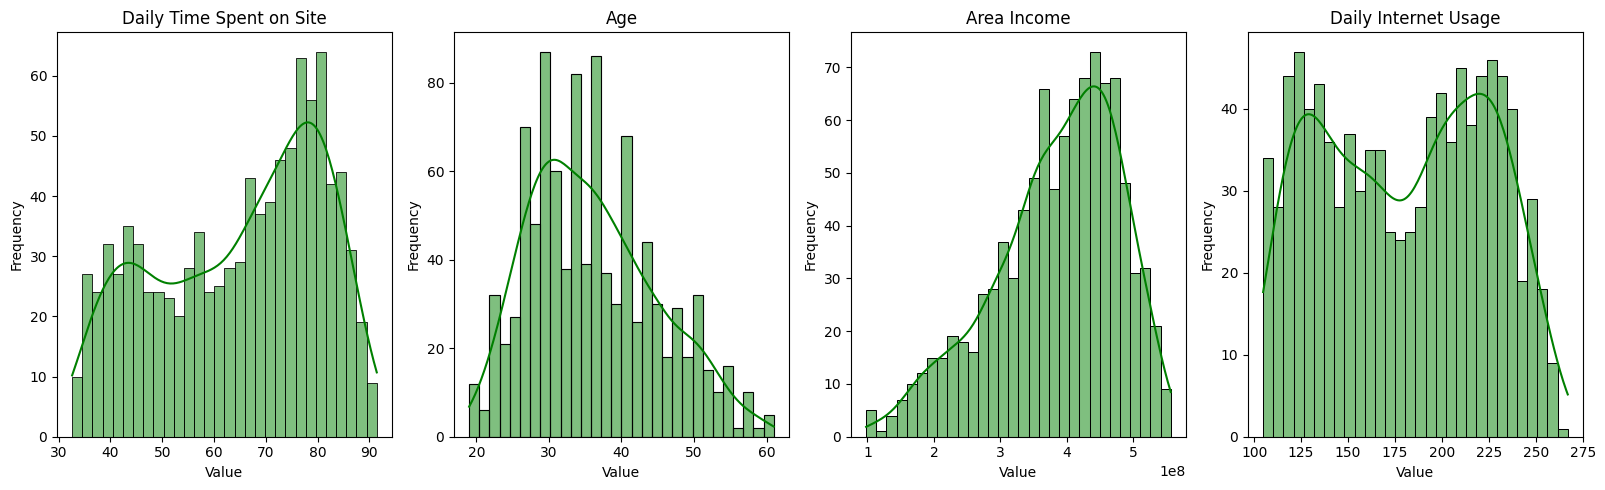

In [31]:
%matplotlib inline
numerical_cols = df.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='green')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout() 
plt.savefig('Histogram univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

**Findings:**
- Age tend to ***right-skewed*** but should be investigated on Boxplot wether it has outliers or not.
- Area Income tend to ***left-skewed*** and likely has outliers.
- Daily Internet Usage feature shows a **bimodal distribution**, indicating two distinct peaks.

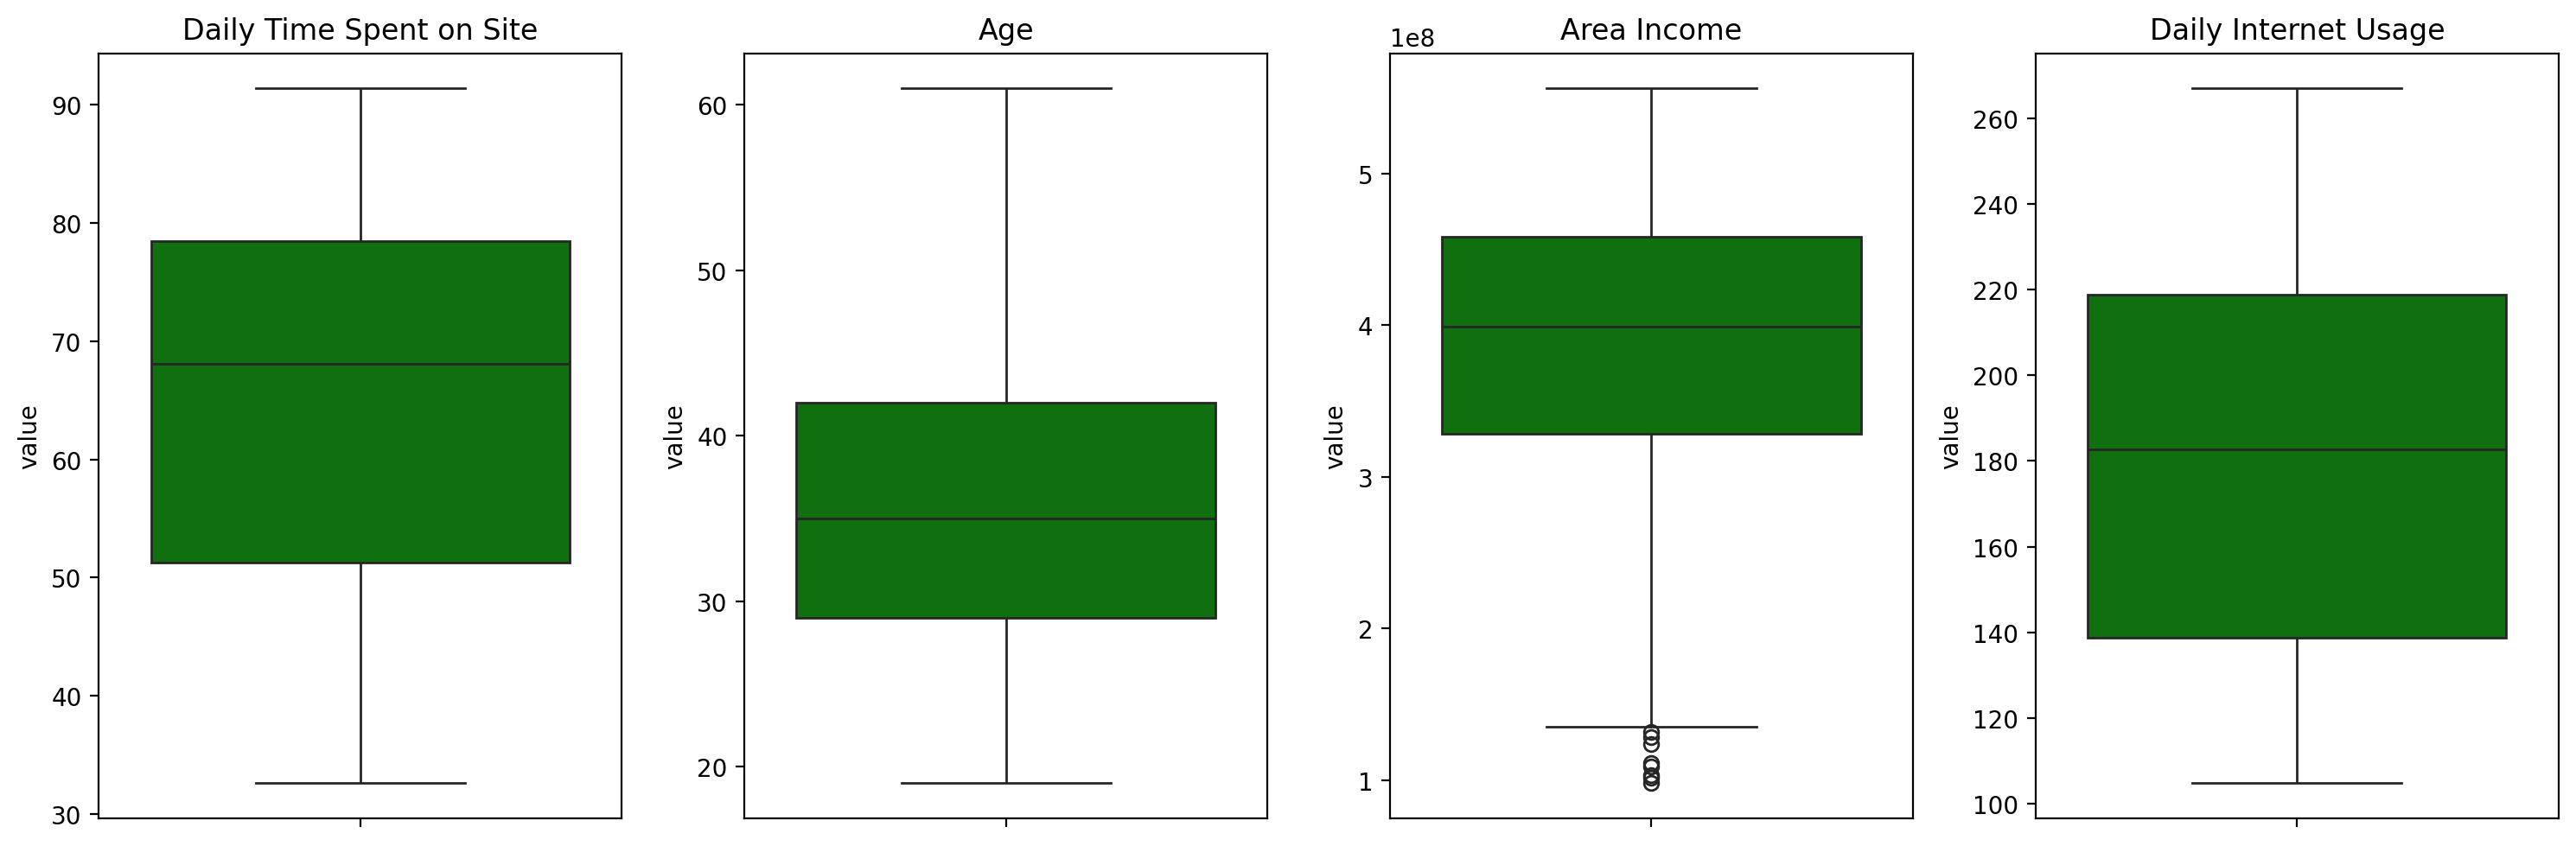

In [32]:
%matplotlib inline
numerical_cols = df.select_dtypes(['float64', 'int64']).columns

num_cols = 4
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(15, num_rows * 5), dpi=200)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)
    plt.ylabel('value')
    plt.tight_layout() 
plt.savefig('Boxplot univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

**Findings:**
- Age **does not** have outliers.
- Area Income has some **outliers** in lower area.

## Categorical Features

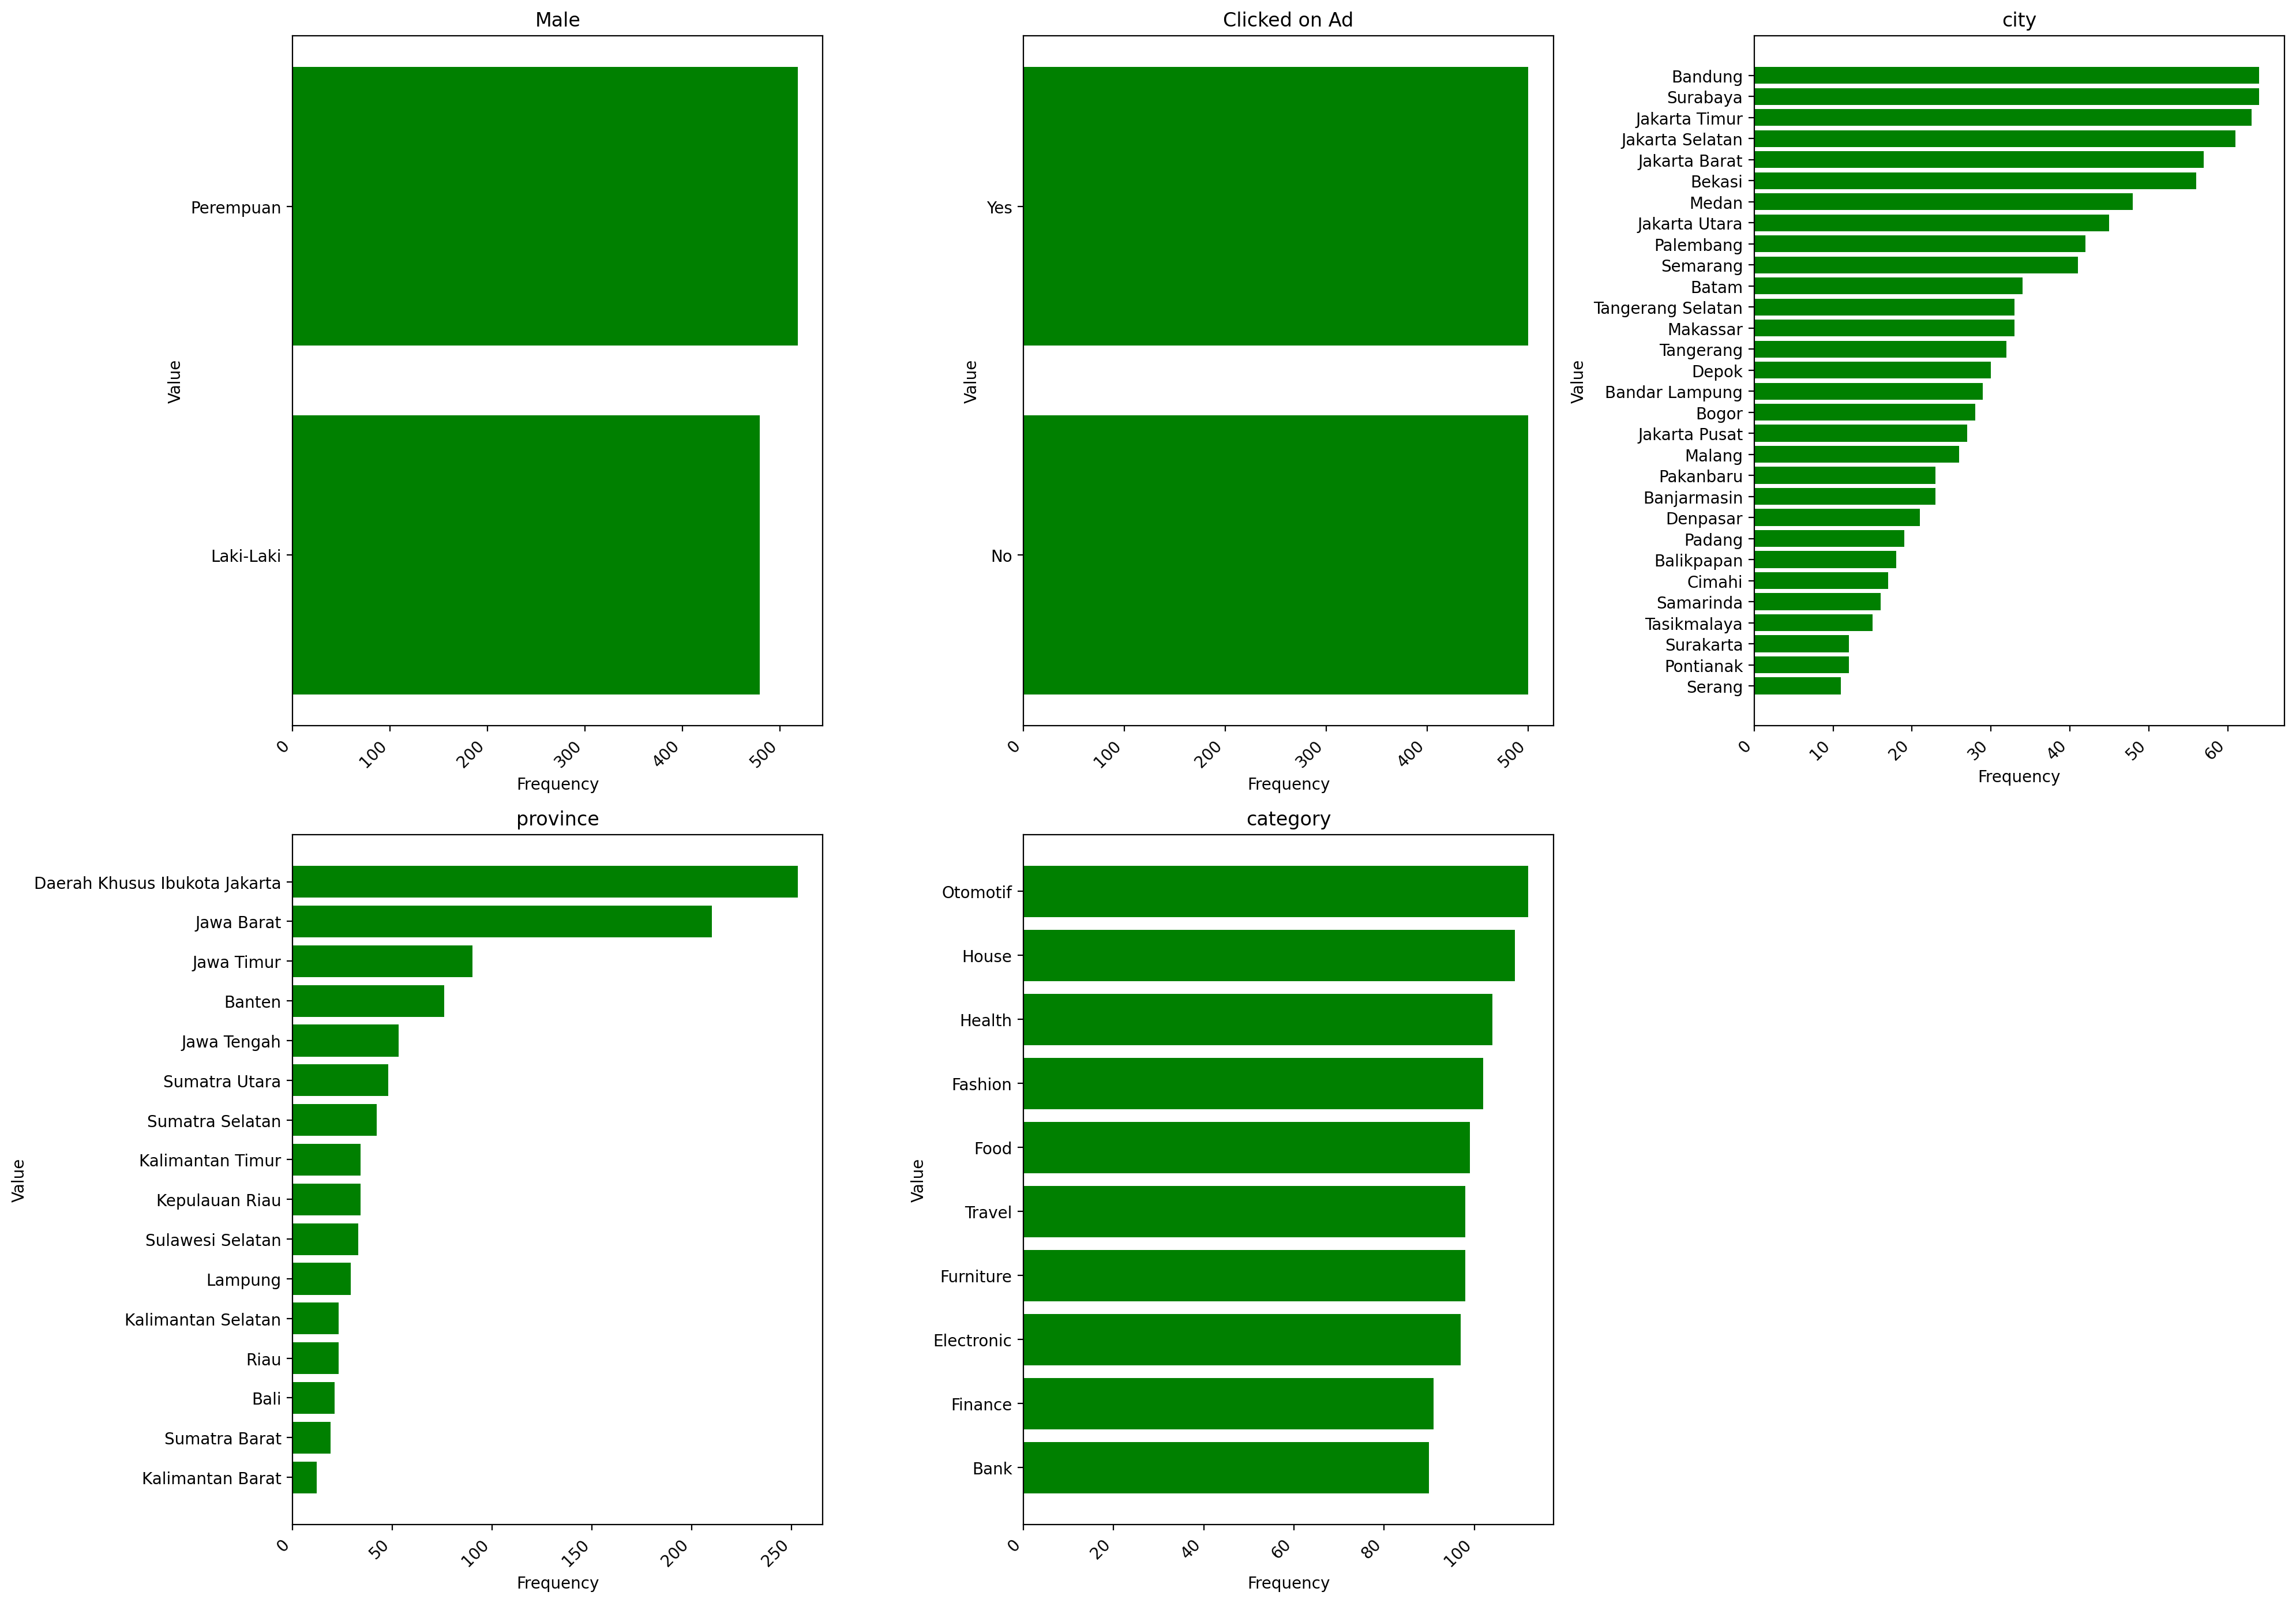

In [33]:
%matplotlib inline
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'Timestamp']
num_cols = 3
num_rows = (len(categorical_cols) // num_cols) + (len(categorical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 7), dpi=200)

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    value_counts = df[col].value_counts(ascending=True)
    plt.barh(value_counts.index, value_counts.values, color='green')
    plt.title(col)
    plt.xlabel('Frequency')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() 
plt.savefig('Countplot univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

# Clicked on Ad User Distribution

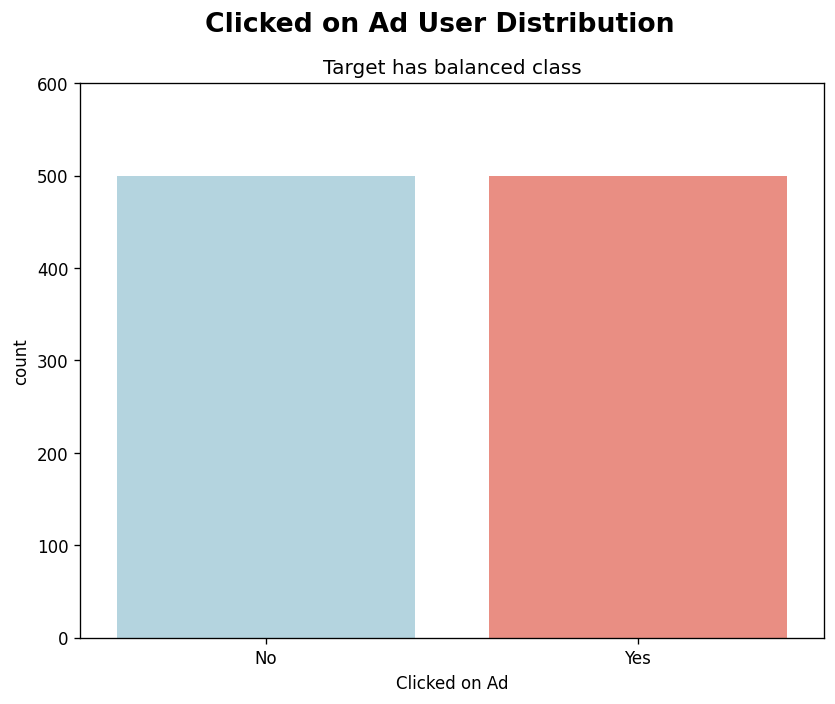

In [8]:
counts = df['Clicked on Ad'].value_counts()
plt.figure(figsize=(8,6), dpi=120)
sns.barplot(x=counts.index,y=counts, palette=['lightblue', 'salmon'])
plt.suptitle('Clicked on Ad User Distribution', fontsize=16, fontweight='bold')
plt.title('Target has balanced class')
plt.ylim(0,600)
plt.savefig('Clicked User Distribution.png', dpi=300, bbox_inches='tight')

plt.show()

## Age Distribution by Ad Clicks

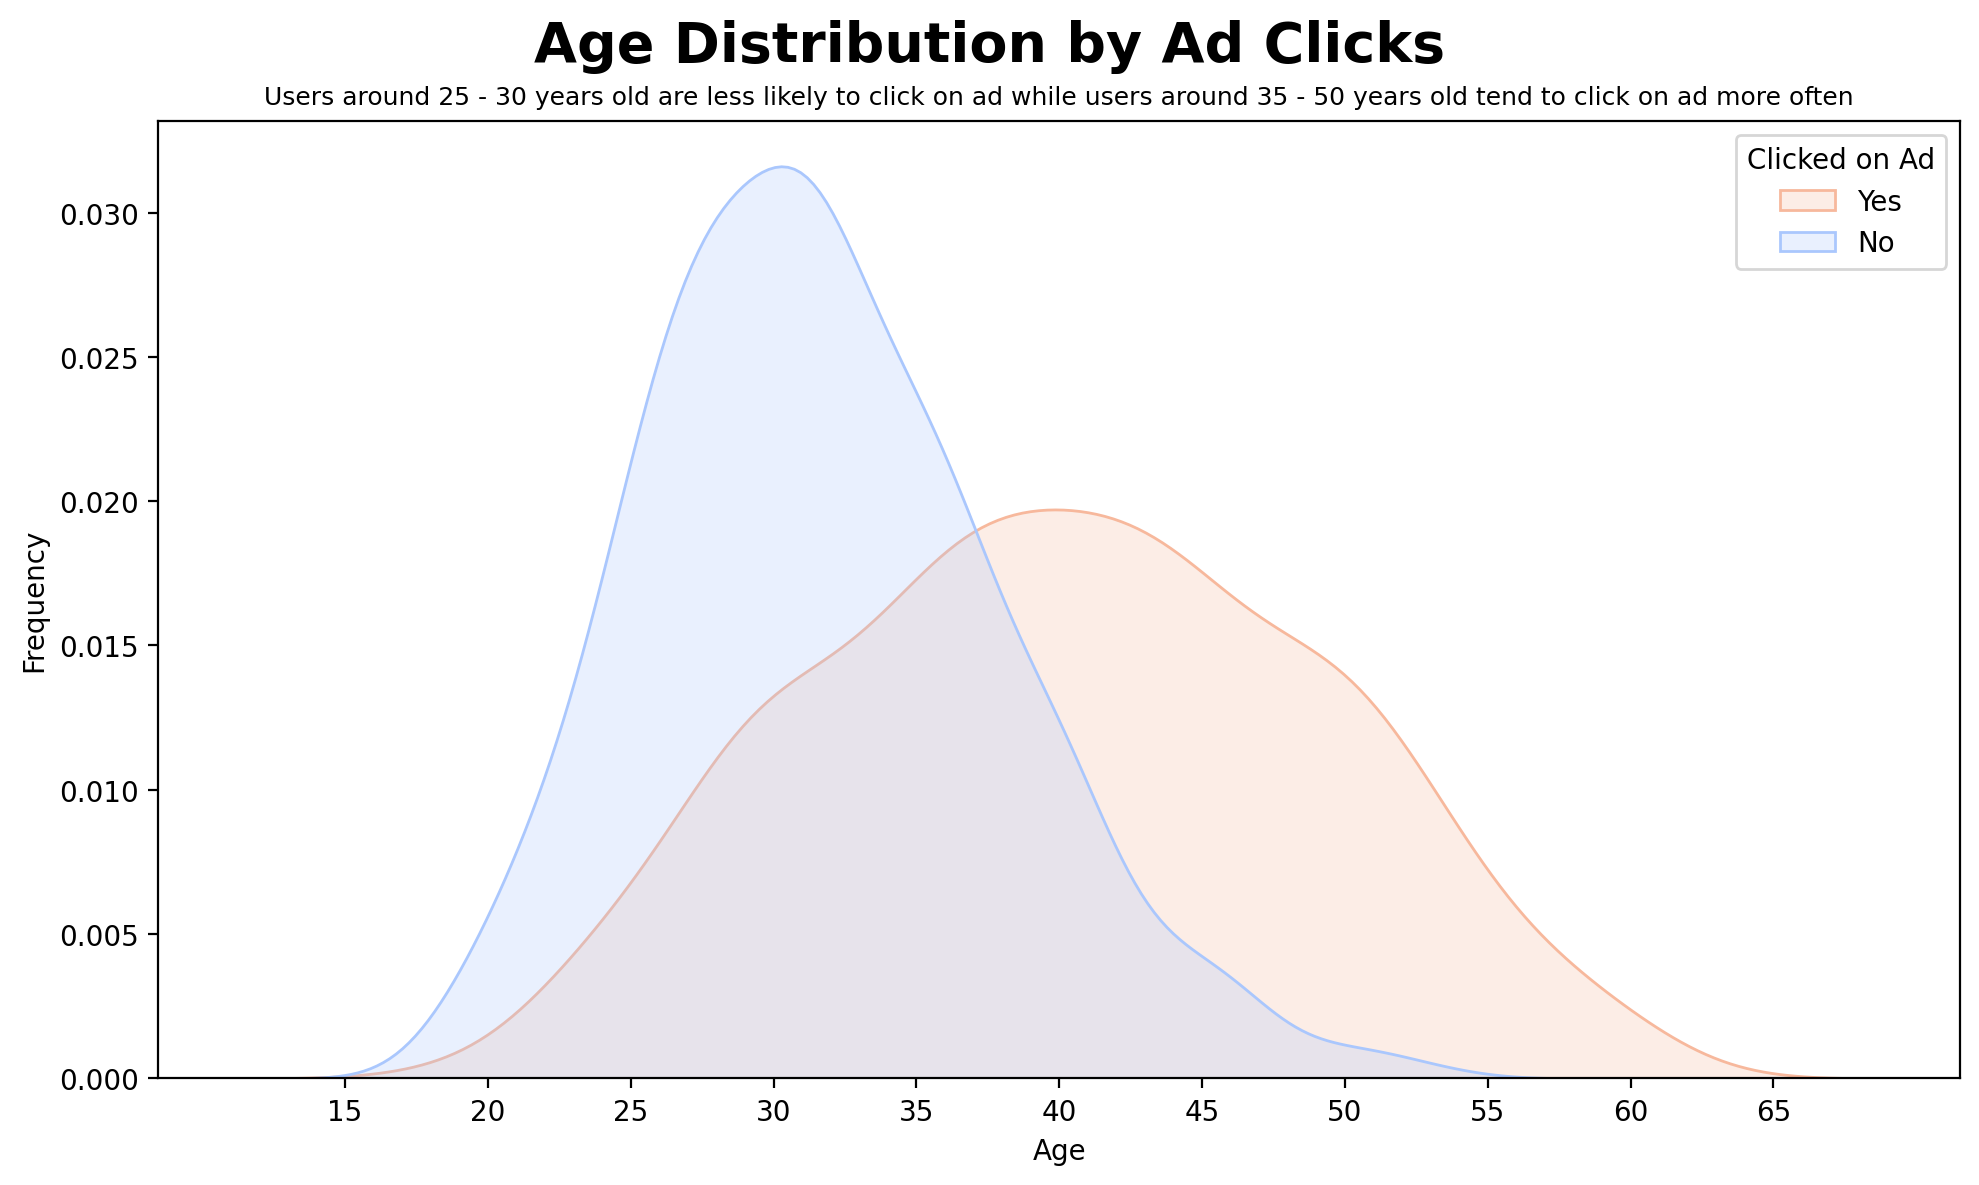

In [9]:
plt.figure(figsize=(10, 6), dpi=200)
sns.kdeplot(data=df, x='Age', hue='Clicked on Ad', palette='coolwarm', fill=True)
plt.suptitle('Age Distribution by Ad Clicks', fontsize=20, fontweight='bold')
plt.title('Users around 25 - 30 years old are less likely to click on ad while users around 35 - 50 years old tend to click on ad more often',
          fontsize=9)
plt.xlabel('Age')
plt.xticks(np.arange(15, 70, 5))
plt.ylabel('Frequency')
plt.legend(title='Clicked on Ad', labels=['Yes','No'])
plt.tight_layout(rect=[0, 0, 1, 1.02])
plt.savefig('Age Distribution by Ad Clicks.png', dpi=300, bbox_inches='tight')

plt.show()


**Inight:**
- Ads are distributed across a wide age range.
- Users aged **35-50** are more likely to **click** on ads, possibly indicating financial stability and interest.
- Although 35-year-olds show a tendency to click on ads, the data also reveals a **significant number who do not**, similar to those **under 35**. This may suggest varying levels of financial stability or differing interests in the ads.

**Recommendation:**
- Tailoring ad content to appeal to the interests and needs of the 35-50 age group could enhance engagement.
- Exploring the reasons behind the lower engagement in users under 35 might help in adjusting strategies to better capture their interest.

## Daily Time Spent On Site by Ad Clicks

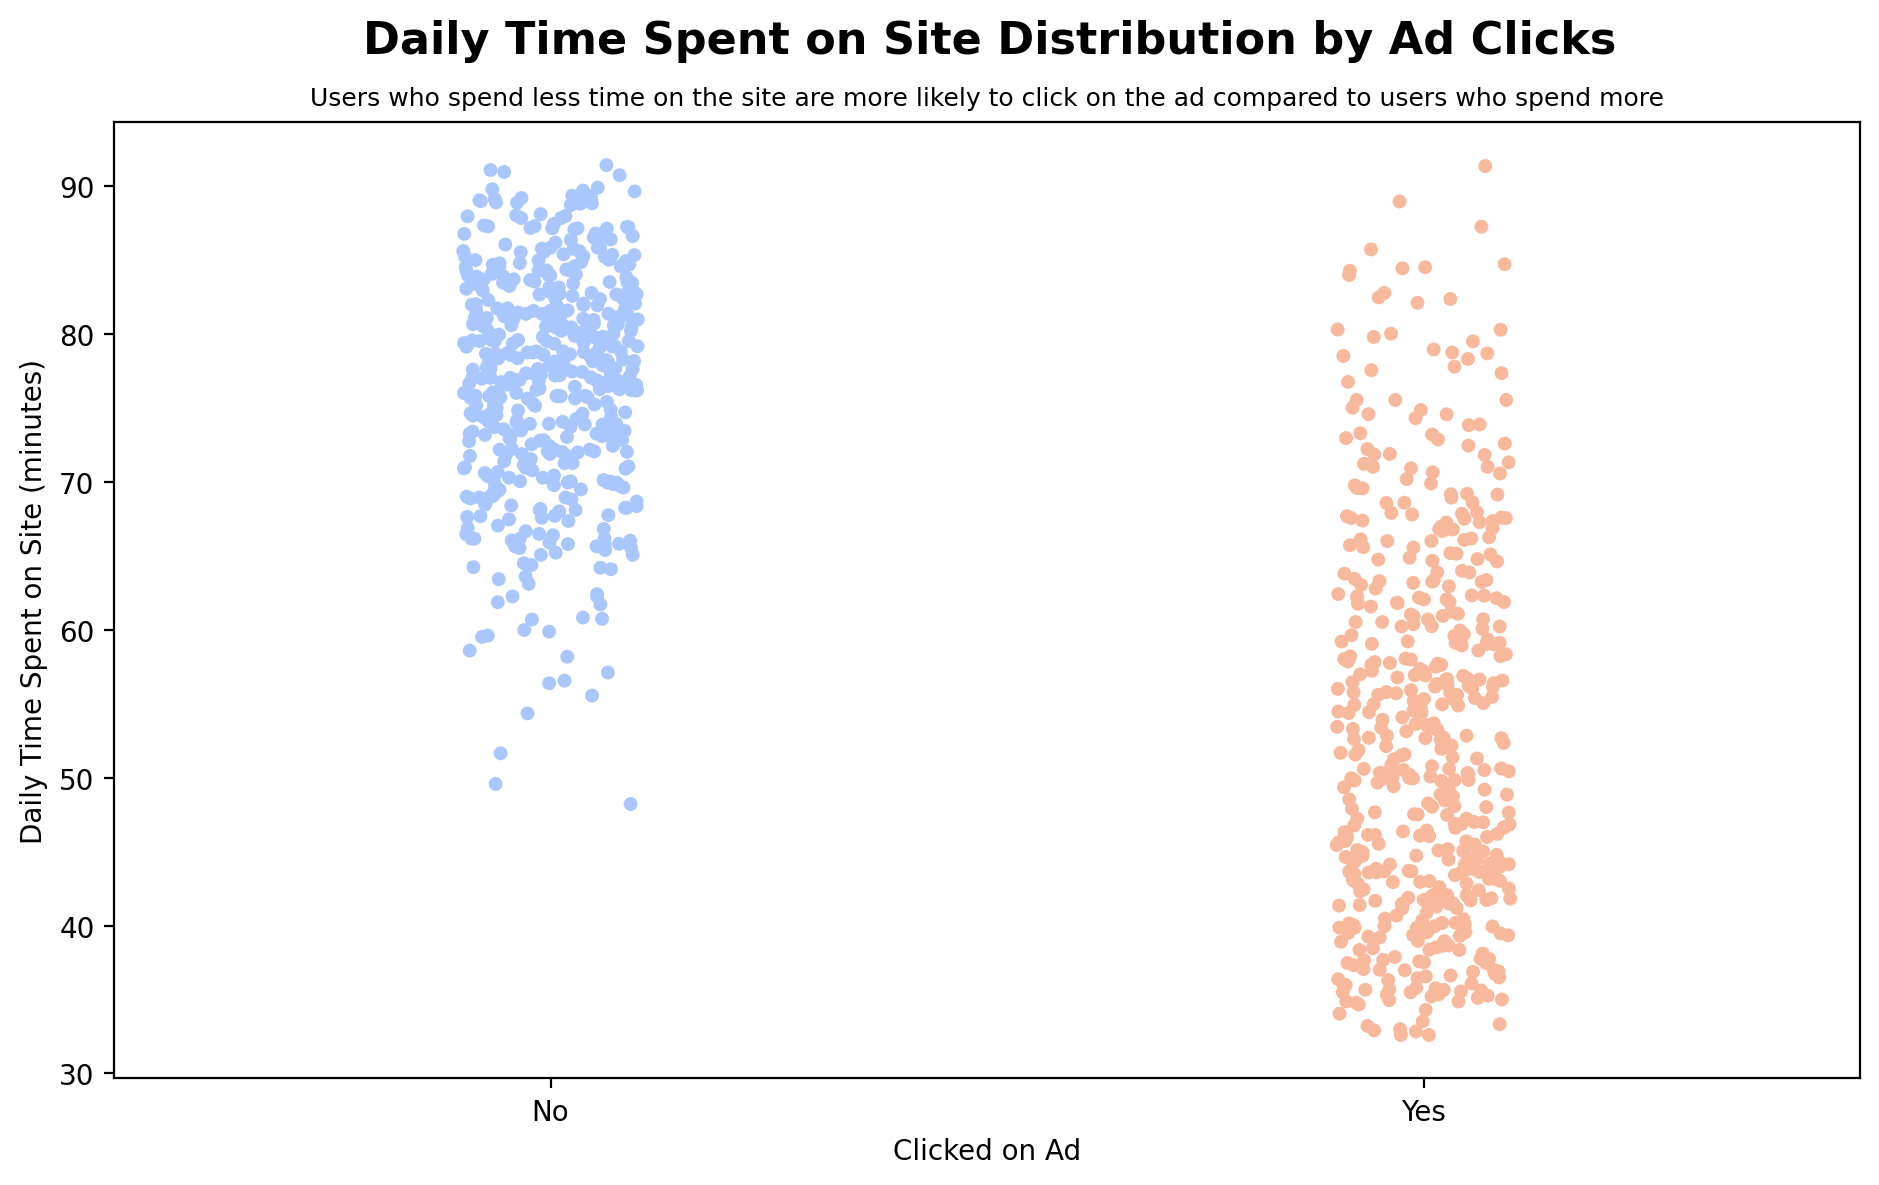

In [10]:
plt.figure(figsize=(10, 6), dpi=200)

# Create a strip plot
sns.stripplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site', jitter=True, palette='coolwarm')

plt.suptitle('Daily Time Spent on Site Distribution by Ad Clicks', fontsize=16, fontweight='bold')
plt.title('Users who spend less time on the site are more likely to click on the ad compared to users who spend more', fontsize=9)
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.tight_layout(rect=[0, 0, 0.95, 1.01])
plt.savefig('Daily Time Spent on Site Distribution by Ad Clicks.png', dpi=300, bbox_inches='tight')

plt.show()


**Insight:**
- Users who spend more time on the site tend to click on ads **less frequently** compared to those with lower time spent.
- This may suggest that users with **less time spent** are possibly **busy individuals** with **good financial stability**, while those with more time might have **different priorities or interests.**

**Additional Insight:**
- Understanding the motivations and behaviors of users with varying site engagement can help tailor ad strategies to better capture their attention.

## Gender by Ad Clicks

In [11]:
df['Male'].value_counts()

Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64

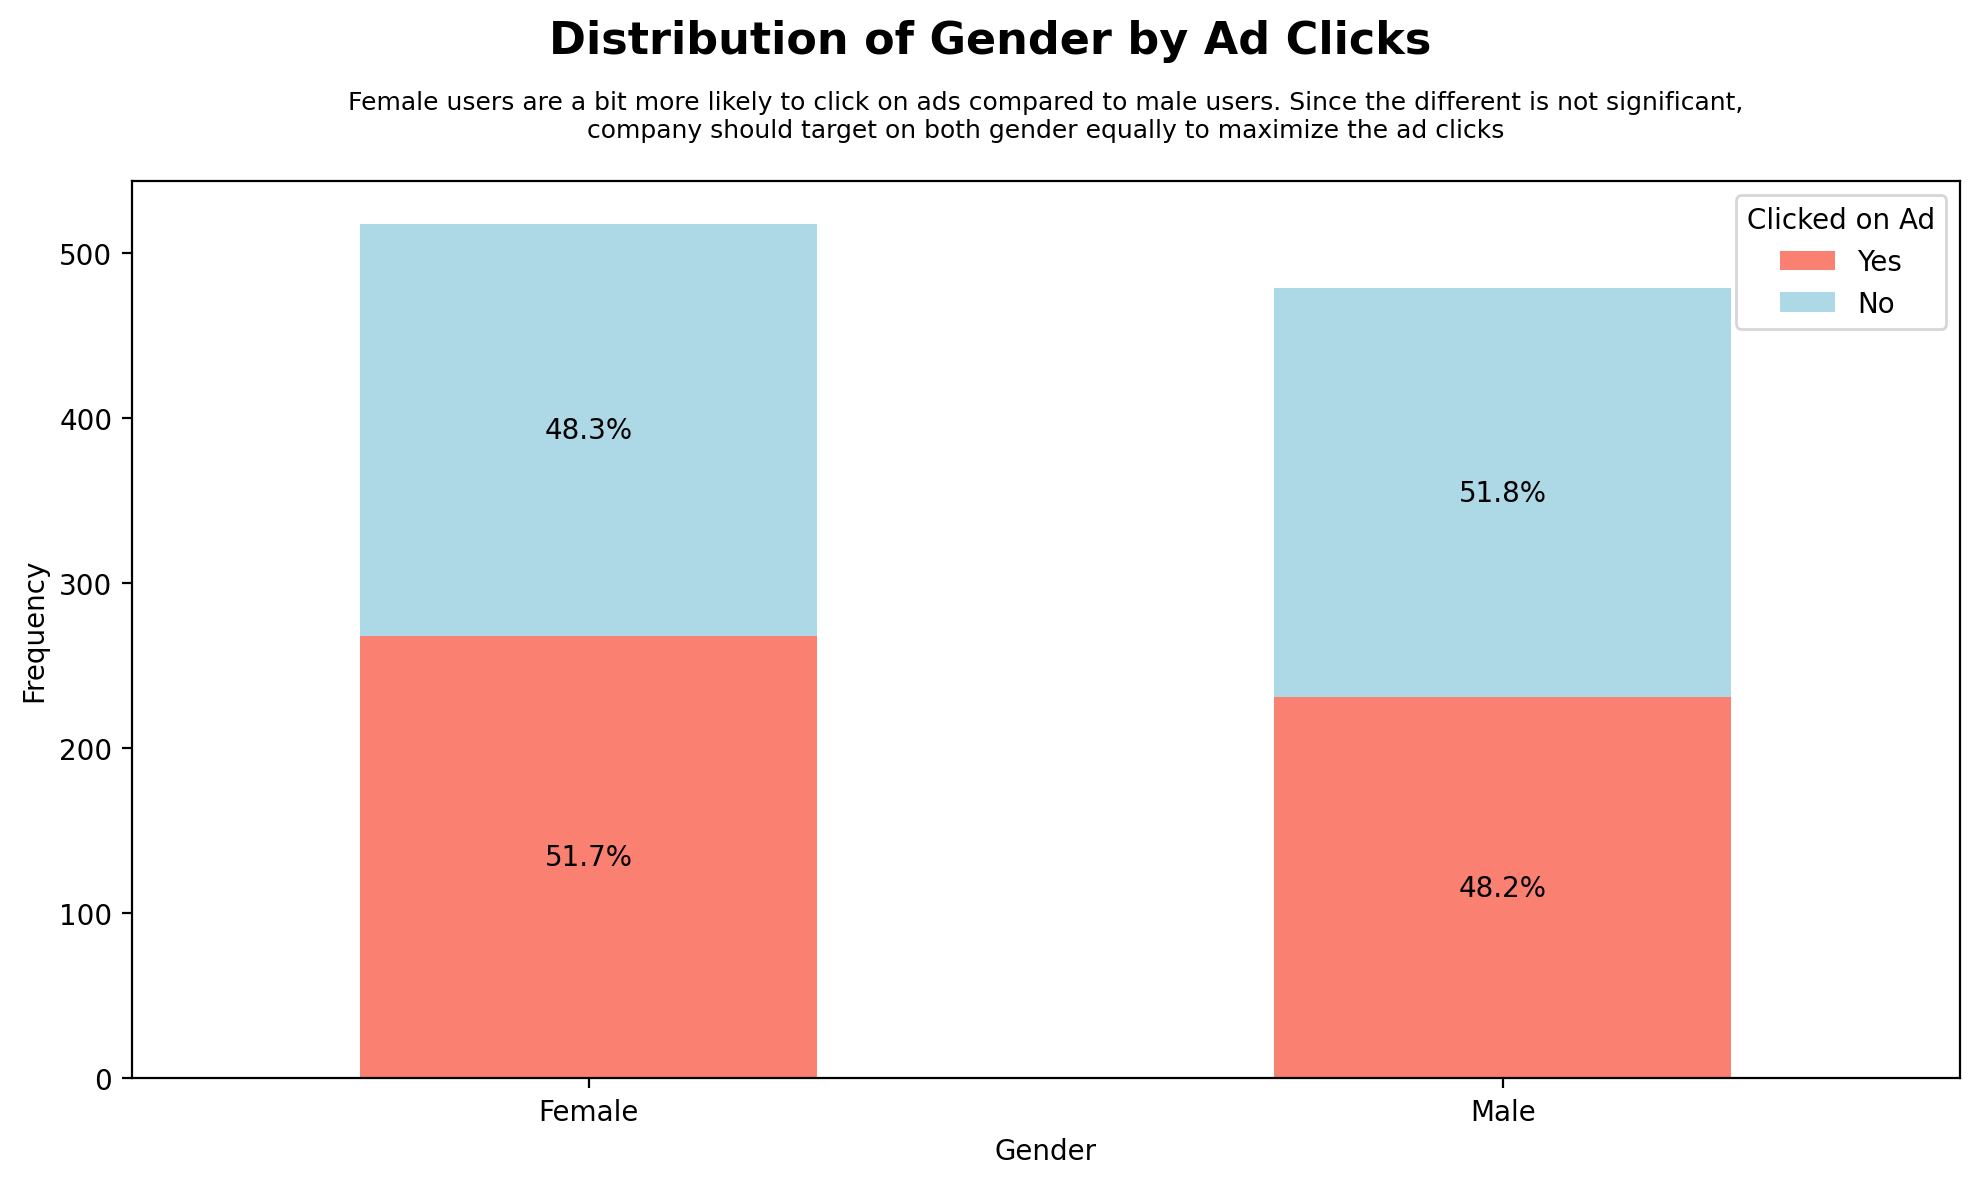

In [12]:
gender_clicks = pd.crosstab(df['Male'], df['Clicked on Ad'])
gender_clicks = gender_clicks[['Yes', 'No']]
gender_clicks = gender_clicks.reindex(gender_clicks.sum(axis=1).sort_values(ascending=False).index)

plt.figure(figsize=(10, 6), dpi=200)
ax = gender_clicks.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], ax=plt.gca())
plt.suptitle('Distribution of Gender by Ad Clicks', fontsize=16, fontweight='bold')
plt.title("""
Female users are a bit more likely to click on ads compared to male users. Since the different is not significant,
company should target on both gender equally to maximize the ad clicks
""", fontsize=9)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Clicked on Ad', labels=['Yes', 'No'], loc='upper right')

# Add percentage labels
for i, (index, row) in enumerate(gender_clicks.iterrows()):
    total = sum(row)
    for j, (label, value) in enumerate(row.items()):
        percentage = value / total * 100
        ax.text(i, sum(row[:j+1]) - value/2, f'{percentage:.1f}%', ha='center', va='center', color='black')

plt.tight_layout(rect=[0, 0, 1, 1.03])
plt.savefig('Distribution of Gender by Ad Clicks.png', dpi=300, bbox_inches='tight')

plt.show()


**Insight:**
- The gender distribution shows a **slightly higher** number of **female users** compared to male users.
- Female users (51.7%) are more likely to click on ads than male users (48.2%).
- While targeting female users might be beneficial, the company should continue to **target both genders**.
- It's important to understand **other factors** that influence ad clicks to optimize targeting strategies.

## Ad Clicks Distribution by Province

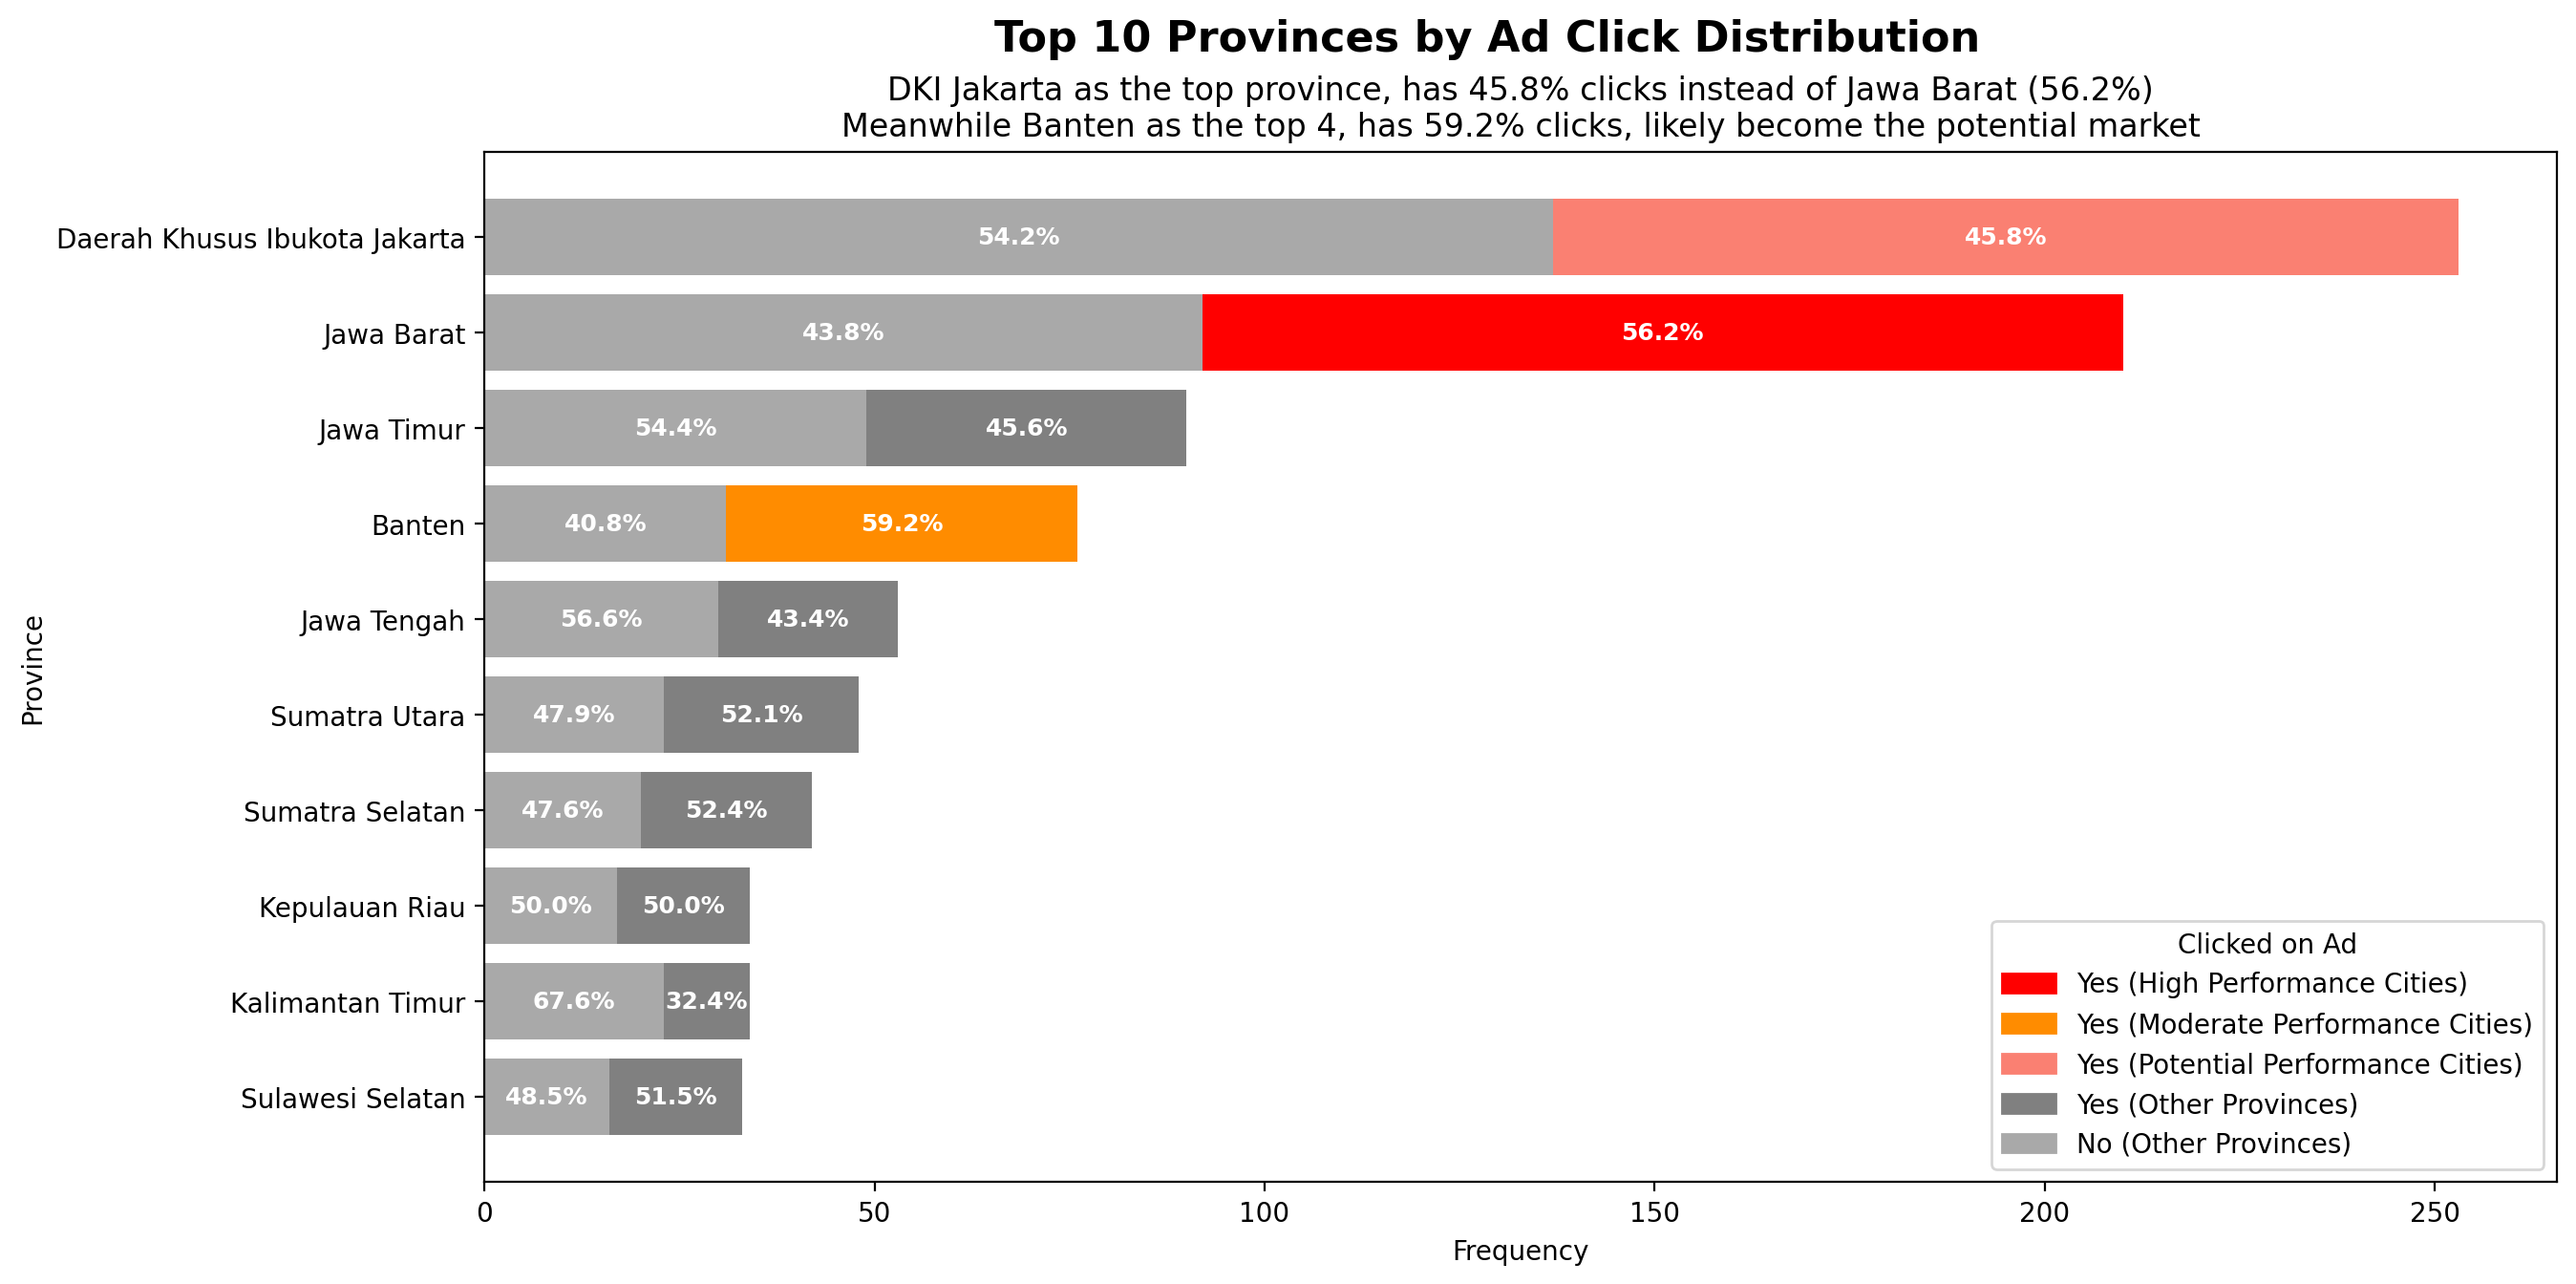

In [13]:
import matplotlib.patches as mpatches
province_clicks = pd.crosstab(df['province'], df['Clicked on Ad'])
province_clicks['Total'] = province_clicks.sum(axis=1)
top_provinces = province_clicks.nlargest(10, 'Total').drop('Total', axis=1)
top_provinces = top_provinces.reindex(top_provinces.sum(axis=1).sort_values(ascending=True).index)

# Define colors
highlight_colors = {
    'Jawa Barat': ('red', 'darkgrey'),
    'Banten': ('darkorange', 'darkgrey'),
    'Daerah Khusus Ibukota Jakarta': ('salmon', 'darkgrey')
}
default_colors = ('gray', 'darkgrey')

# Plot
plt.figure(figsize=(14, 7), dpi=200)
ax = plt.gca()

for i, (index, row) in enumerate(top_provinces.iterrows()):
    colors = highlight_colors.get(index, default_colors)
    ax.barh(index, row['No'], color=colors[1])
    ax.barh(index, row['Yes'], left=row['No'], color=colors[0])

plt.suptitle('Top 10 Provinces by Ad Click Distribution', fontsize=16, fontweight='bold')
plt.title(
    'DKI Jakarta as the top province, has 45.8% clicks instead of Jawa Barat (56.2%)\n'
    'Meanwhile Banten as the top 4, has 59.2% clicks, likely become the potential market',
    fontsize=12
)
plt.xlabel('Frequency')
plt.ylabel('Province')

# Add legend
yes_patch = mpatches.Patch(color='gray', label='Yes (Other Provinces)')
no_patch = mpatches.Patch(color='darkgray', label='No (Other Provinces)')
high_patch = mpatches.Patch(color='red', label='Yes (High Performance Cities)')
potential_patch = mpatches.Patch(color='salmon', label='Yes (Potential Performance Cities)')
moderate_patch = mpatches.Patch(color='darkorange', label='Yes (Moderate Performance Cities)')
plt.legend(handles=[high_patch, moderate_patch, potential_patch, yes_patch, no_patch], title='Clicked on Ad', loc='lower right')

# Add percentage labels
for i, (index, row) in enumerate(top_provinces.iterrows()):
    total = sum(row)
    for j, (label, value) in enumerate(row.items()):
        percentage = value / total * 100
        x_pos = sum(row[:j+1]) - value / 2
        ax.text(x_pos, i, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0, 1.03])
plt.savefig('Top 10 Provinces by Ad Click Distribution.png', dpi=300, bbox_inches='tight')

plt.show()


In [14]:
province_clicks['click_rate'] = round(province_clicks['Yes'] / province_clicks['Total'] * 100, 2)
province_clicks = province_clicks.sort_values('Total', ascending=False)
province_clicks

Clicked on Ad,No,Yes,Total,click_rate
province,,,,
Daerah Khusus Ibukota Jakarta,137,116,253,45.85
Jawa Barat,92,118,210,56.19
Jawa Timur,49,41,90,45.56
Banten,31,45,76,59.21
Jawa Tengah,30,23,53,43.40
Sumatra Utara,23,25,48,52.08
Sumatra Selatan,20,22,42,52.38
Kalimantan Timur,23,11,34,32.35
Kepulauan Riau,17,17,34,50.00


**Insight:**
- **High Engagement in Jawa Barat and Banten**: <br>
These provinces exhibit **high** ad click rates, indicating strong user engagement. This suggests effective targeting or content relevance in these areas.

- **Moderate Engagement** <br>
in Jakarta: Despite being **a major urban area**, Jakarta shows a **lower click rate of 45%**. This could indicate saturation or less effective ad placement strategies.

**Recommendations:**
- **Leverage High-Performing Areas:** <br>
Continue investing in targeted advertising in Jawa Barat and Banten. Analyze successful strategies here and consider applying similar tactics elsewhere.

- **Enhance Jakarta Strategy:** <br>
Investigate the reasons behind Jakarta's lower engagement. Consider experimenting with different ad formats, content, or targeting to better capture the audience's attention.

- **A/B Testing:** <br>
Implement A/B testing in underperforming areas to identify what resonates best with the audience. This can help in refining ad content and strategy.

- **Audience Analysis:** <br>
Conduct a deeper analysis of audience demographics and preferences in Jakarta to tailor ads more effectively.

- **Diversify Channels:** <br> 
Explore additional advertising channels or platforms in Jakarta to reach a broader audience and increase engagement.

## Ad Clicks Distribution by City

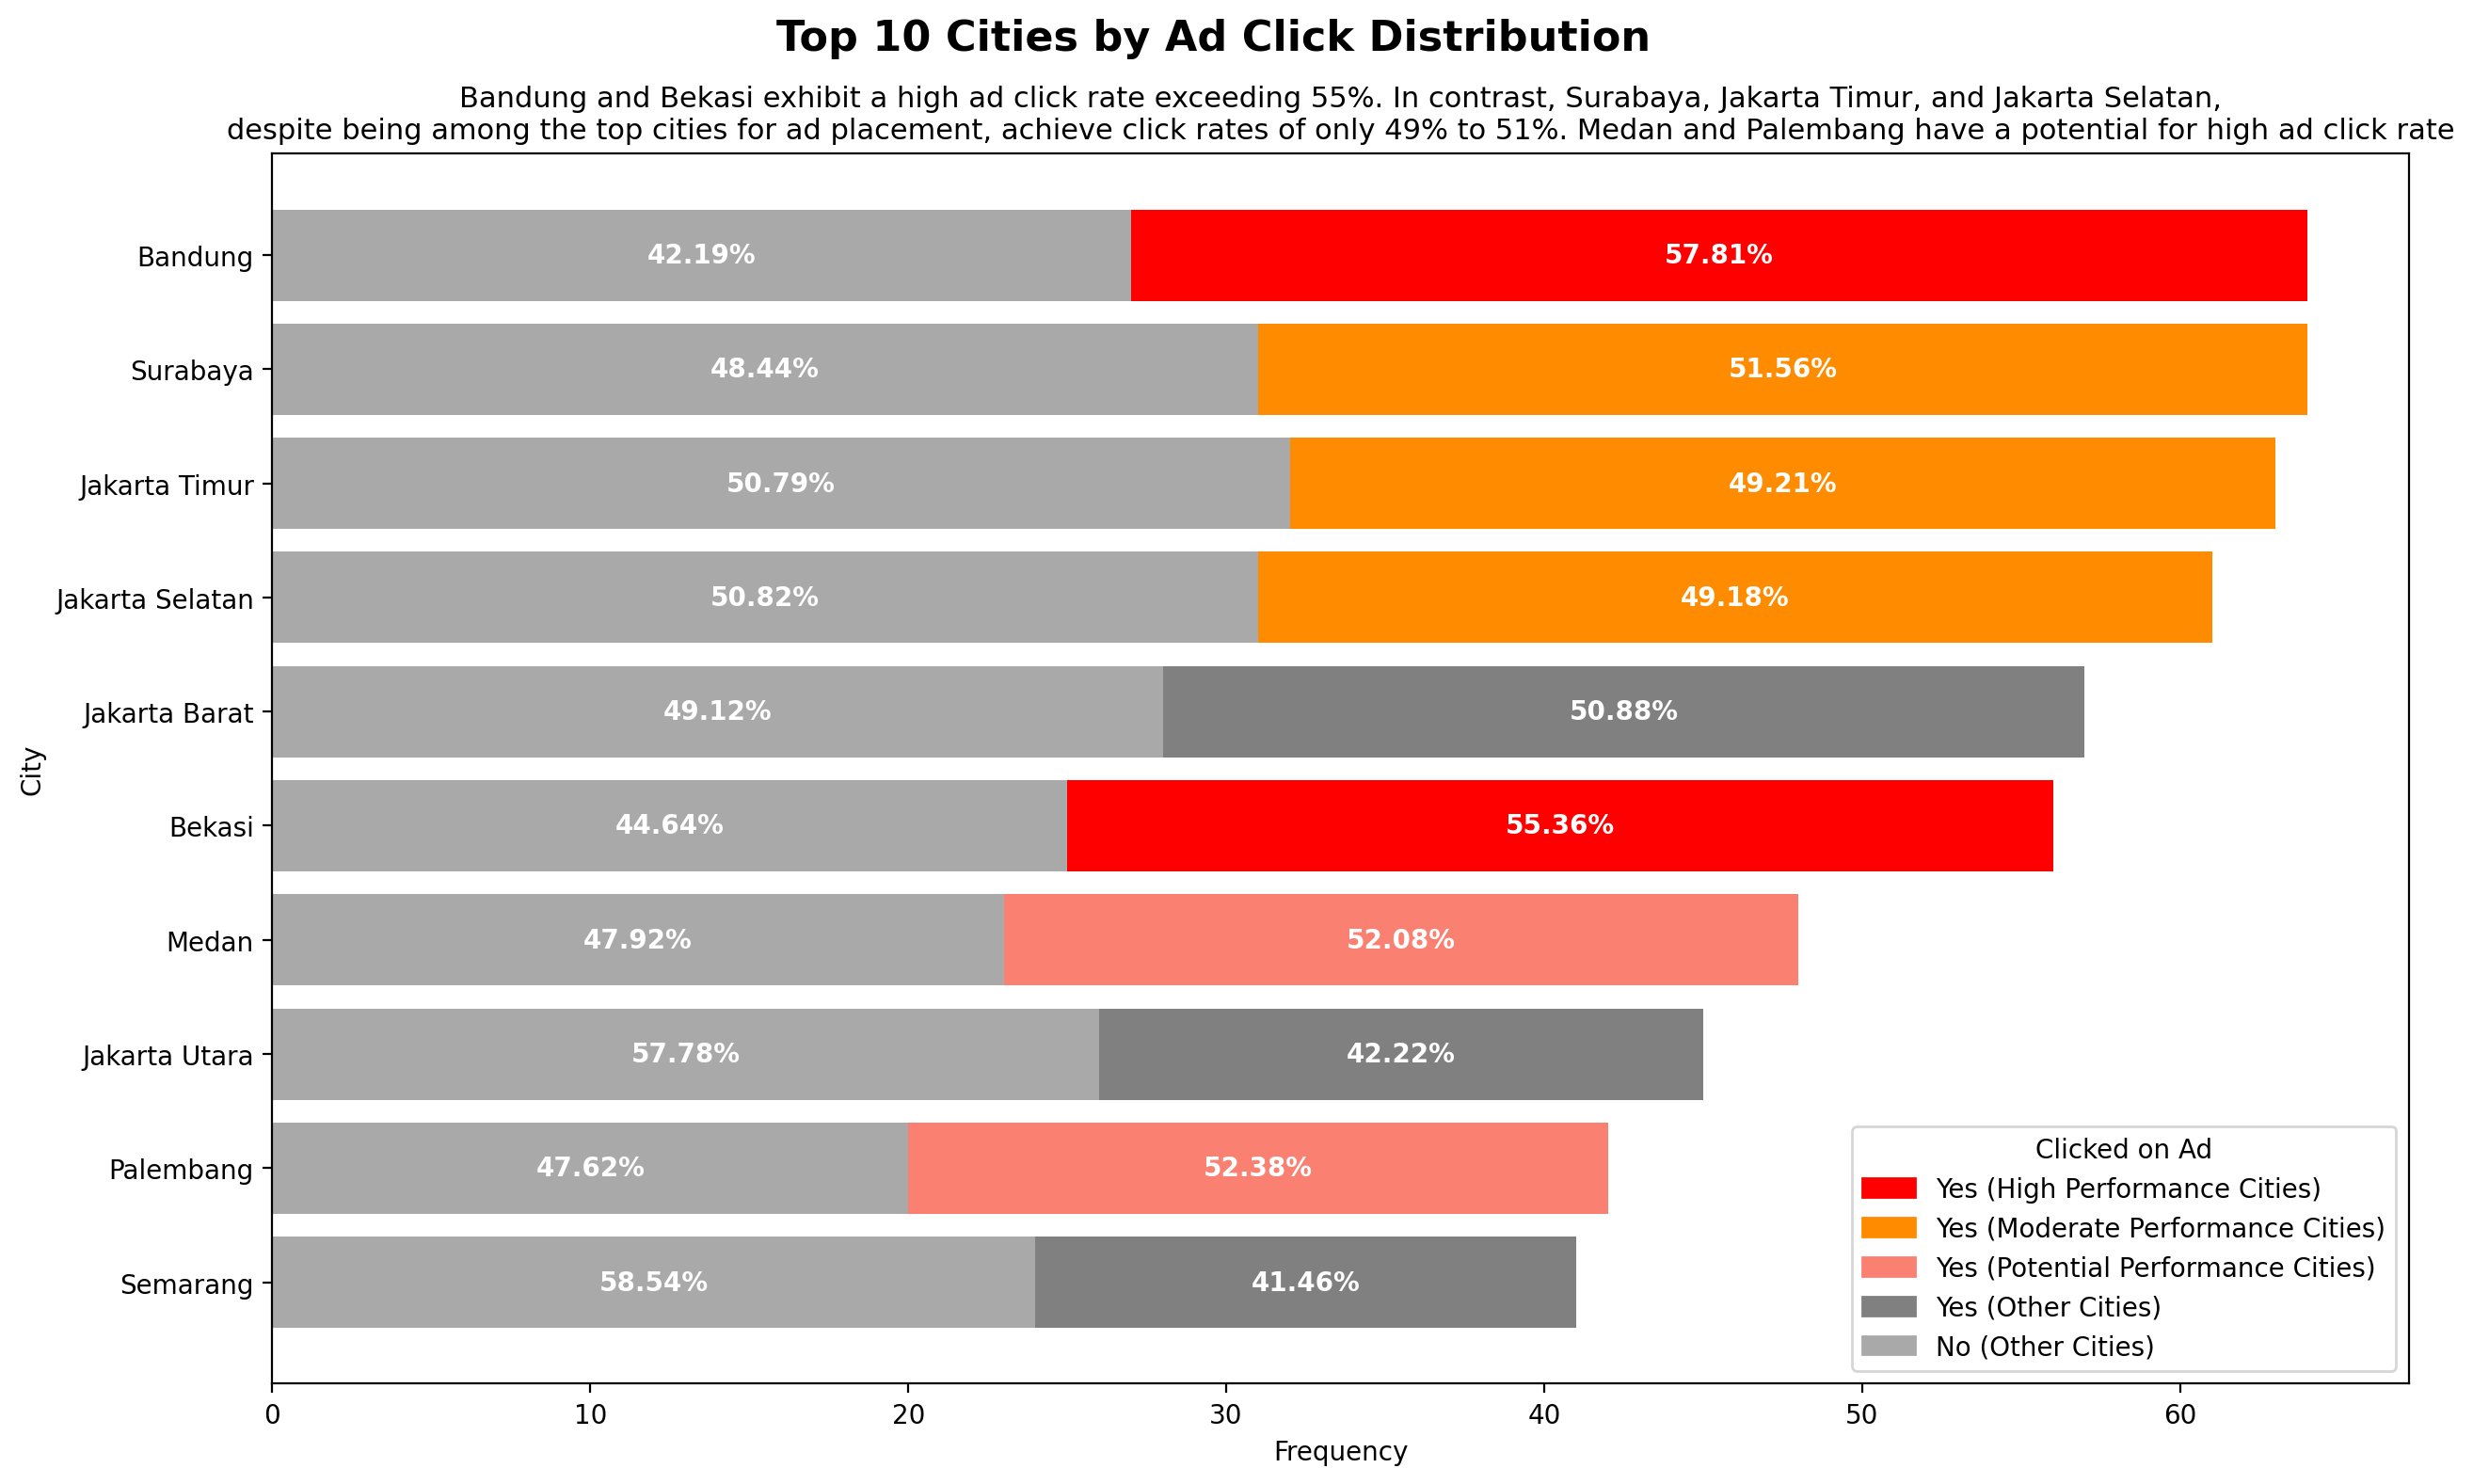

In [15]:
import matplotlib.patches as mpatches
city_clicks = pd.crosstab(df['city'], df['Clicked on Ad'])
city_clicks['Total'] = city_clicks.sum(axis=1)
top_cities = city_clicks.nlargest(10, 'Total').drop('Total', axis=1)
top_cities = top_cities.reindex(top_cities.sum(axis=1).sort_values(ascending=True).index)

# Define colors
highlight_colors = {
    'Bandung': ('red', 'darkgray'),
    'Bekasi': ('red', 'darkgray'),
    'Surabaya': ('darkorange', 'darkgray'),
    'Jakarta Timur': ('darkorange', 'darkgray'),
    'Jakarta Selatan': ('darkorange', 'darkgray'),
    'Medan': ('salmon', 'darkgray'),
    'Palembang': ('salmon', 'darkgray')
}
default_colors = ('gray', 'darkgray')

# Plot
plt.figure(figsize=(13, 8), dpi=200)
ax = plt.gca()
for i, (index, row) in enumerate(top_cities.iterrows()):
    colors = highlight_colors.get(index, default_colors)
    ax.barh(index, row['No'], color=colors[1])
    ax.barh(index, row['Yes'], left=row['No'], color=colors[0])
plt.suptitle('Top 10 Cities by Ad Click Distribution', fontsize=16, fontweight='bold')
plt.title(
    'Bandung and Bekasi exhibit a high ad click rate exceeding 55%. '
    'In contrast, Surabaya, Jakarta Timur, and Jakarta Selatan,\n'
    'despite being among the top cities for ad placement, achieve click rates of only 49% to 51%. '
    'Medan and Palembang have a potential for high ad click rate',
    fontsize=11
)
plt.xlabel('Frequency')
plt.ylabel('City')

# Add legend
yes_patch = mpatches.Patch(color='gray', label='Yes (Other Cities)')
no_patch = mpatches.Patch(color='darkgray', label='No (Other Cities)')
high_patch = mpatches.Patch(color='red', label='Yes (High Performance Cities)')
potential_patch = mpatches.Patch(color='salmon', label='Yes (Potential Performance Cities)')
moderate_patch = mpatches.Patch(color='darkorange', label='Yes (Moderate Performance Cities)')
plt.legend(handles=[high_patch, moderate_patch, potential_patch, yes_patch, no_patch], title='Clicked on Ad', loc='lower right')

# Add percentage labels
for i, (index, row) in enumerate(top_cities.iterrows()):
    total = sum(row)
    for j, (label, value) in enumerate(row.items()):
        percentage = value / total * 100
        x_pos = sum(row[:j+1]) - value / 2
        ax.text(x_pos, i, f'{percentage:.2f}%', ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('Top 10 Cities by Ad Click Distribution.png', dpi=300, bbox_inches='tight')

plt.show()


In [16]:
city_clicks['click_rate'] = round(city_clicks['Yes'] / city_clicks['Total'] * 100, 2)
city_clicks = city_clicks.sort_values('Total', ascending=False)
city_clicks

Clicked on Ad,No,Yes,Total,click_rate
city,,,,
Bandung,27,37,64,57.81
Surabaya,31,33,64,51.56
Jakarta Timur,32,31,63,49.21
Jakarta Selatan,31,30,61,49.18
Jakarta Barat,28,29,57,50.88
Bekasi,25,31,56,55.36
Medan,23,25,48,52.08
Jakarta Utara,26,19,45,42.22
Palembang,20,22,42,52.38


**Insight:**
- **High Performance:** <br>
**Bandung and Bekasi show strong ad click rates**, exceeding 55%. This indicates a high level of engagement in these cities.

- **Moderate Performance:** <br>
**Surabaya, Jakarta Timur, and Jakarta Selatan**, despite being major cities, have **moderate** click rates ranging from 49% to 51%.

- **Potential for Improvement:** <br>
Other cities like **Medan and Palembang** also show high engagement, suggesting **potential** for targeted marketing strategies.

**Recommendations:**
- **Focus on High-Performing Cities**: <br>
Continue to invest in advertising in Bandung and Bekasi to capitalize on their high engagement rates.

- **Enhance Strategies in Moderate Cities**: <br>
Explore tailored marketing strategies in Surabaya, Jakarta Timur, and Jakarta Selatan to boost engagement. Consider localized content or promotions.

- **Leverage Insights from High Engagement**: <br>
Analyze what drives high engagement in cities like medan and Palembang and apply these insights to other regions.

- **Optimize Resource Allocation**: <br>
Allocate resources strategically, focusing on cities with both high engagement and potential for growth.

## Timestamp User's Ad Clicks

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
clicked_data = df[df['Clicked on Ad'] == 'Yes']
clicked_data['Hour'] = clicked_data['Timestamp'].dt.hour
hour_counts = clicked_data['Hour'].value_counts().sort_index()

# Plot the distribution of clicks by hour

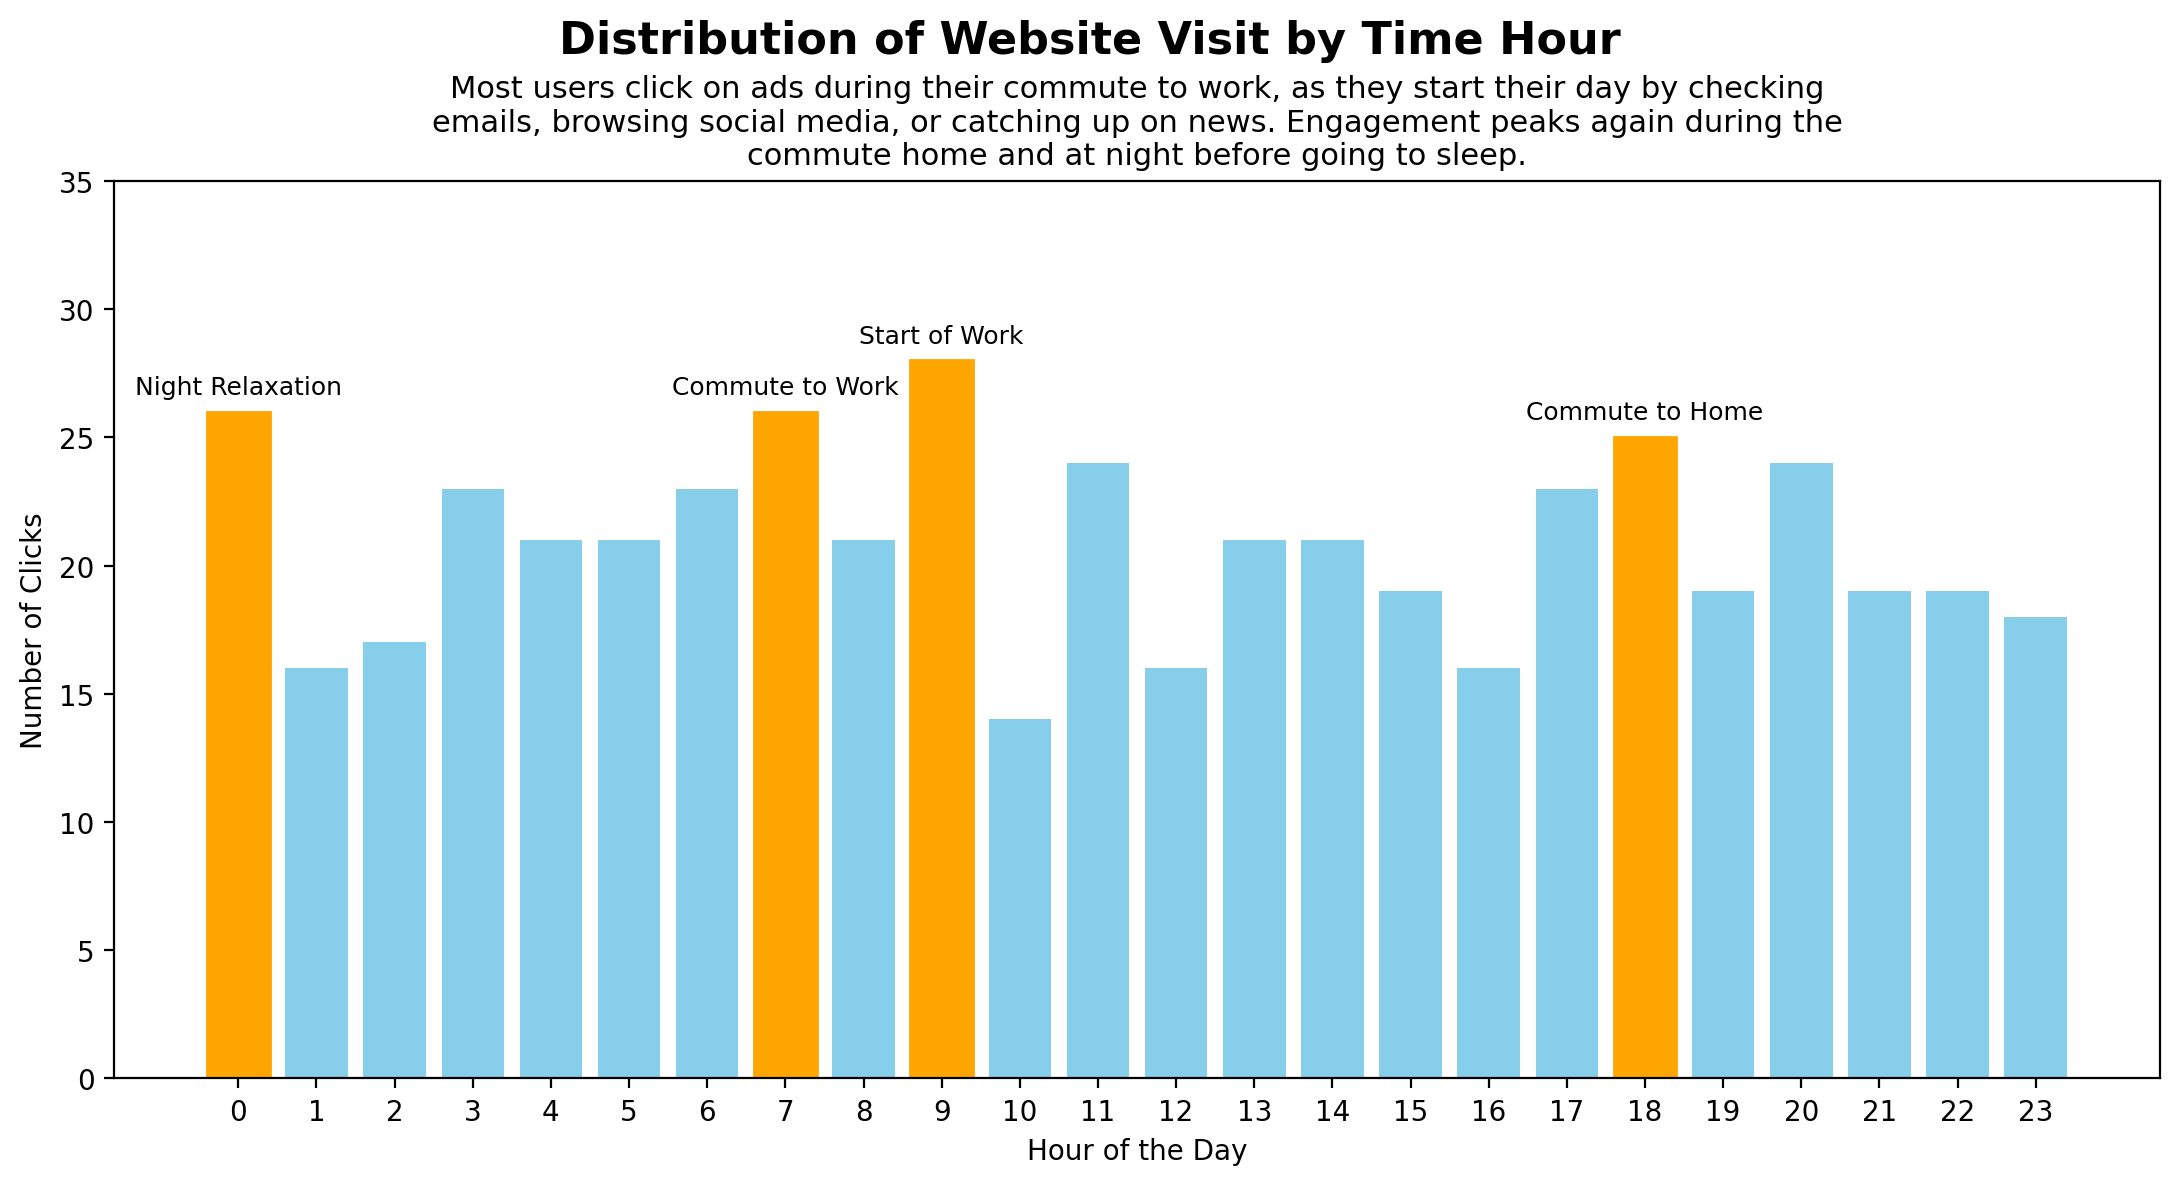

In [18]:
plt.figure(figsize=(11, 6), dpi=200)
bars = plt.bar(hour_counts.index, hour_counts.values, color='skyblue')

# Highlight specific hours
highlight_hours = [0, 7, 9, 18]
for bar, hour in zip(bars, hour_counts.index):
    if hour in highlight_hours:
        bar.set_color('darkorange')
# Highlight specific hours
highlight_hours = [0, 7, 9, 18]
annotations = {
    0: 'Night Relaxation',
    7: 'Commute to Work',
    9: 'Start of Work',
    18: 'Commute to Home'
}

for bar, hour in zip(bars, hour_counts.index):
    if hour in highlight_hours:
        bar.set_color('orange')
        plt.text(hour, bar.get_height() + 0.5, annotations[hour], ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(range(0, 24))
plt.suptitle('Distribution of Website Visit by Time Hour', fontsize=16, fontweight='bold')
plt.title('Most users click on ads during their commute to work, as they start their day by checking\n'
          'emails, browsing social media, or catching up on news. Engagement peaks again during the\n'
          'commute home and at night before going to sleep.', fontsize=11)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clicks')
plt.yticks(range(0, 36, 5))
plt.tight_layout(rect=[0, 0, 1, 1.02])
plt.savefig('Distribution of Website Visit by Time Hour.png', dpi=300, bbox_inches='tight')

plt.show()


In [19]:
print('Users Data with clicked on ad at 12 A.M.:')
clicked_data[clicked_data['Hour'] == 0].sample(3)

Users Data with clicked on ad at 12 A.M.:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Hour
845,44.16,42,431836510.0,133.42,Laki-Laki,2016-05-25 00:34:00,Yes,Makassar,Sulawesi Selatan,House,0
929,82.49,45,270517800.0,130.84,Perempuan,2016-05-31 00:58:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,House,0
523,67.94,43,479130190.0,128.16,Perempuan,2016-05-01 00:23:00,Yes,Surabaya,Jawa Timur,Fashion,0


In [20]:
print('Users Data with clicked on ad at 7 A.M.:')
clicked_data[clicked_data['Hour'] == 7].sample(3)

Users Data with clicked on ad at 7 A.M.:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Hour
54,62.31,47,439057990.0,119.30,Perempuan,2016-02-14 07:36:00,Yes,Samarinda,Kalimantan Timur,Health,7
932,63.30,38,441499380.0,116.19,Perempuan,2016-05-09 07:13:00,Yes,Surabaya,Jawa Timur,Furniture,7
360,38.91,33,394588180.0,150.80,Laki-Laki,2016-07-13 07:41:00,Yes,Tangerang,Banten,Health,7


In [21]:
print('Users Data with clicked on ad at 9 A.M.:')
clicked_data[clicked_data['Hour'] == 9].sample(3)

Users Data with clicked on ad at 9 A.M.:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Hour
840,72.46,40,396783240.0,113.53,Perempuan,2016-05-01 09:23:00,Yes,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Electronic,9
222,49.95,39,481164250.0,136.59,Perempuan,2016-03-24 09:12:00,Yes,Bekasi,Jawa Barat,Food,9
48,44.33,37,369063380.0,123.72,Laki-Laki,2016-01-08 09:32:00,Yes,Medan,Sumatra Utara,Furniture,9


In [22]:
print('Users Data with clicked on ad at 18 A.M.:')
clicked_data[clicked_data['Hour'] == 18].sample(3)

Users Data with clicked on ad at 18 A.M.:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Hour
762,53.63,54,352336040.0,126.29,Laki-Laki,2016-01-08 18:13:00,Yes,Pakanbaru,Riau,Otomotif,18
545,42.60,55,385851550.0,168.29,Perempuan,2016-07-11 18:12:00,Yes,Surabaya,Jawa Timur,House,18
131,41.67,36,376719140.0,132.55,Perempuan,2016-06-13 18:50:00,Yes,Medan,Sumatra Utara,Health,18


**Insight:**
- **Peak Engagement Times:** <br>
Users are most likely to click on ads during their morning at **7 A.M.**, common routines of checking emails, browsing social media, and catching up on news at **9 A.M.**, and evening commutes at **6 P.M.**, as well as at night before sleeping at **12 A.M.**

- **Consistent Night Activity:** <br>
The **consistent activity** during late hours suggests users are engaging with content as part of their **relaxation routine**.

**Recommendations:**
- **Targeted Ad Scheduling:** <br>
Schedule ads to appear prominently during peak hours (morning commute, start of work, evening commute, and night relaxation) to maximize visibility and engagement.

- **Content Optimization:** <br>
Tailor ad content to fit the context of these times. For example, morning ads could focus on productivity or news, while evening ads might highlight relaxation or entertainment.

- **Mobile Optimization:** <br>
Ensure ads are optimized for mobile devices, as users are likely accessing content on their phones during commutes.

- **A/B Testing:** <br>
Conduct A/B tests during these peak times to refine ad formats and messages for better engagement.

- **Leverage Retargeting:** <br>
Use retargeting strategies to reach users who engaged with ads during these peak times, potentially increasing conversion rates.

# Bivariate Analysis

## Age Distribution by Daily Internet Usage

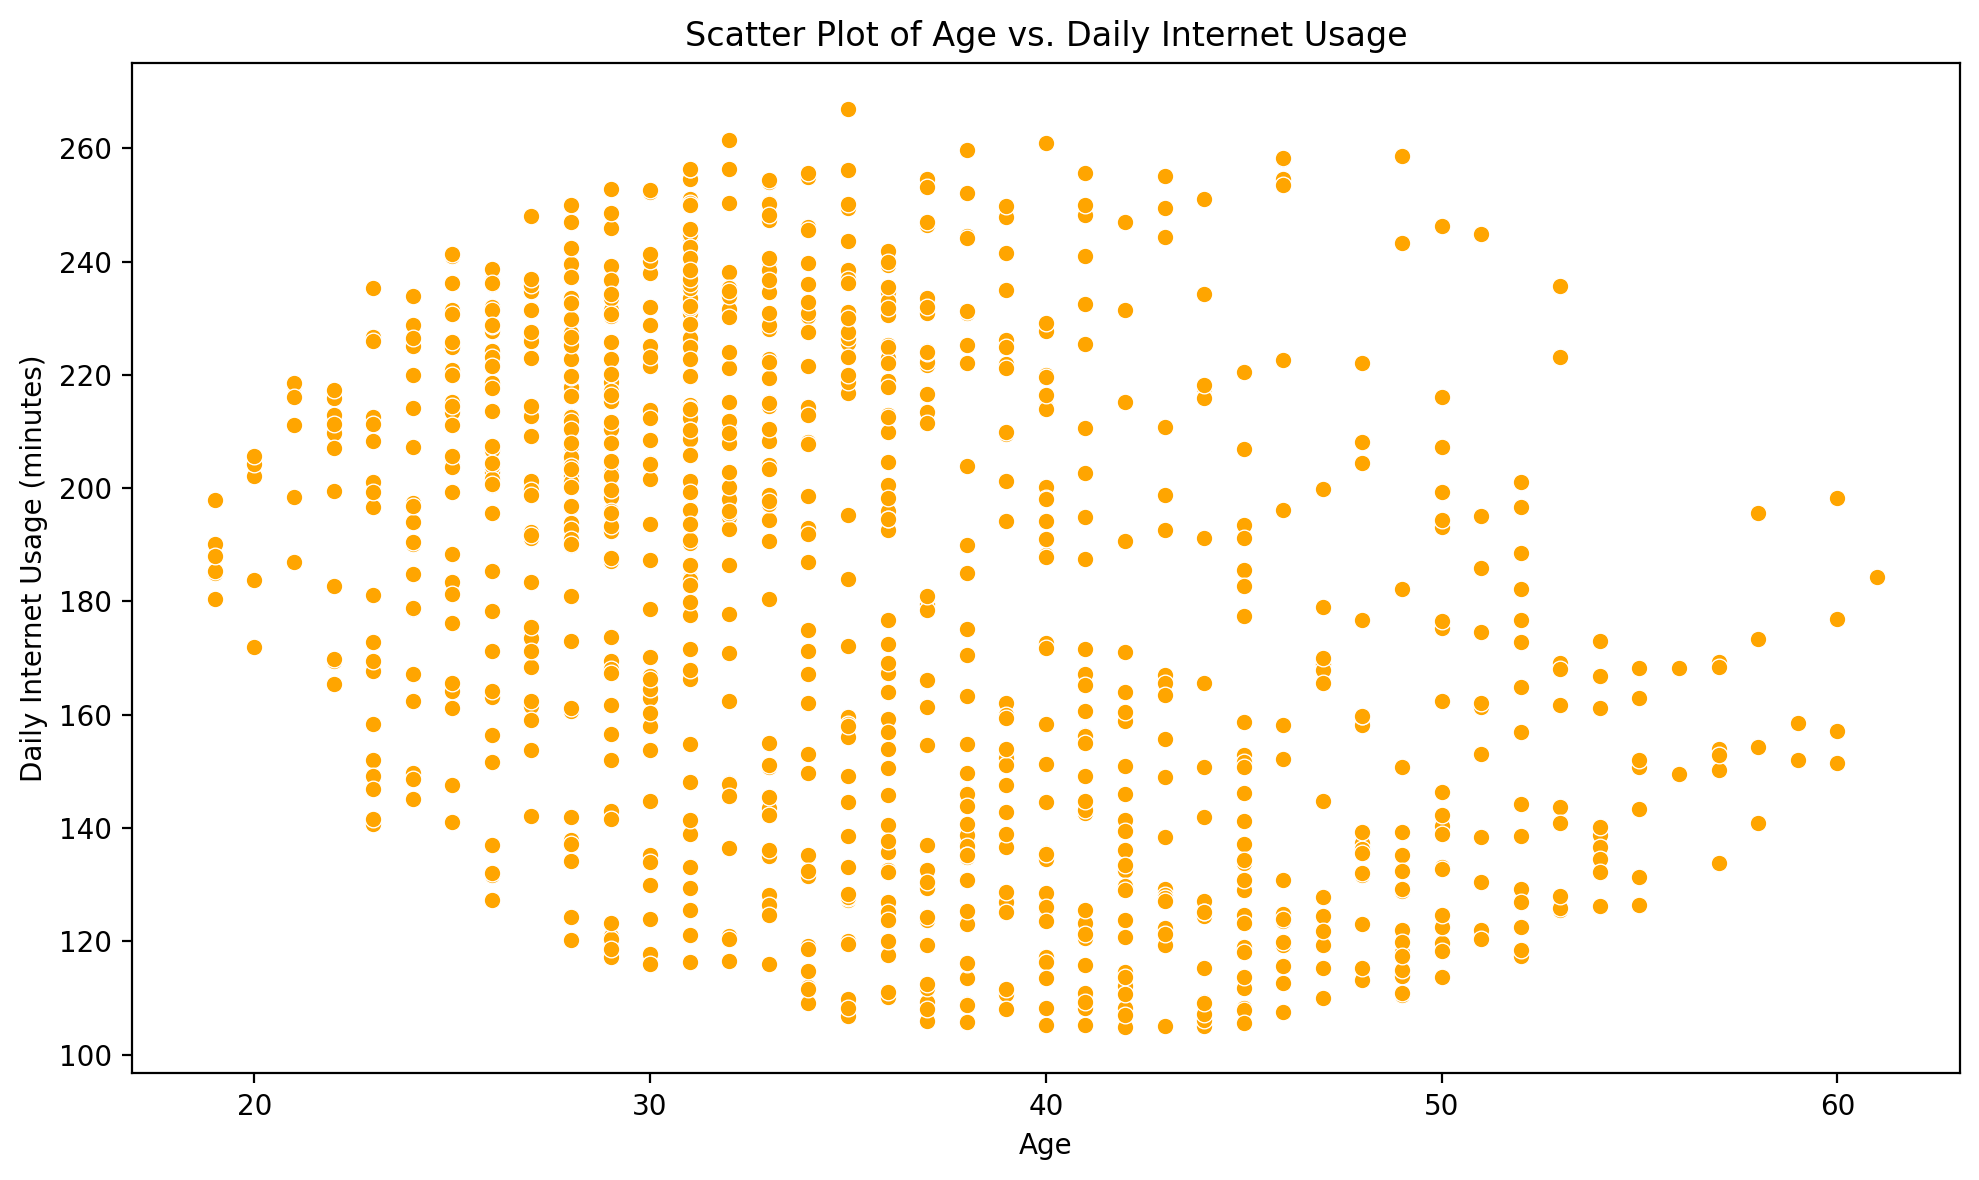

In [23]:
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', color='orange')
plt.title('Scatter Plot of Age vs. Daily Internet Usage')
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage (minutes)')
plt.tight_layout()
plt.show()


**Correlation between Age and Daily Internet Usage:**
- there is a wide range of internet usage across different ages, with **no clear linear** relationship between age and daily internet usage.

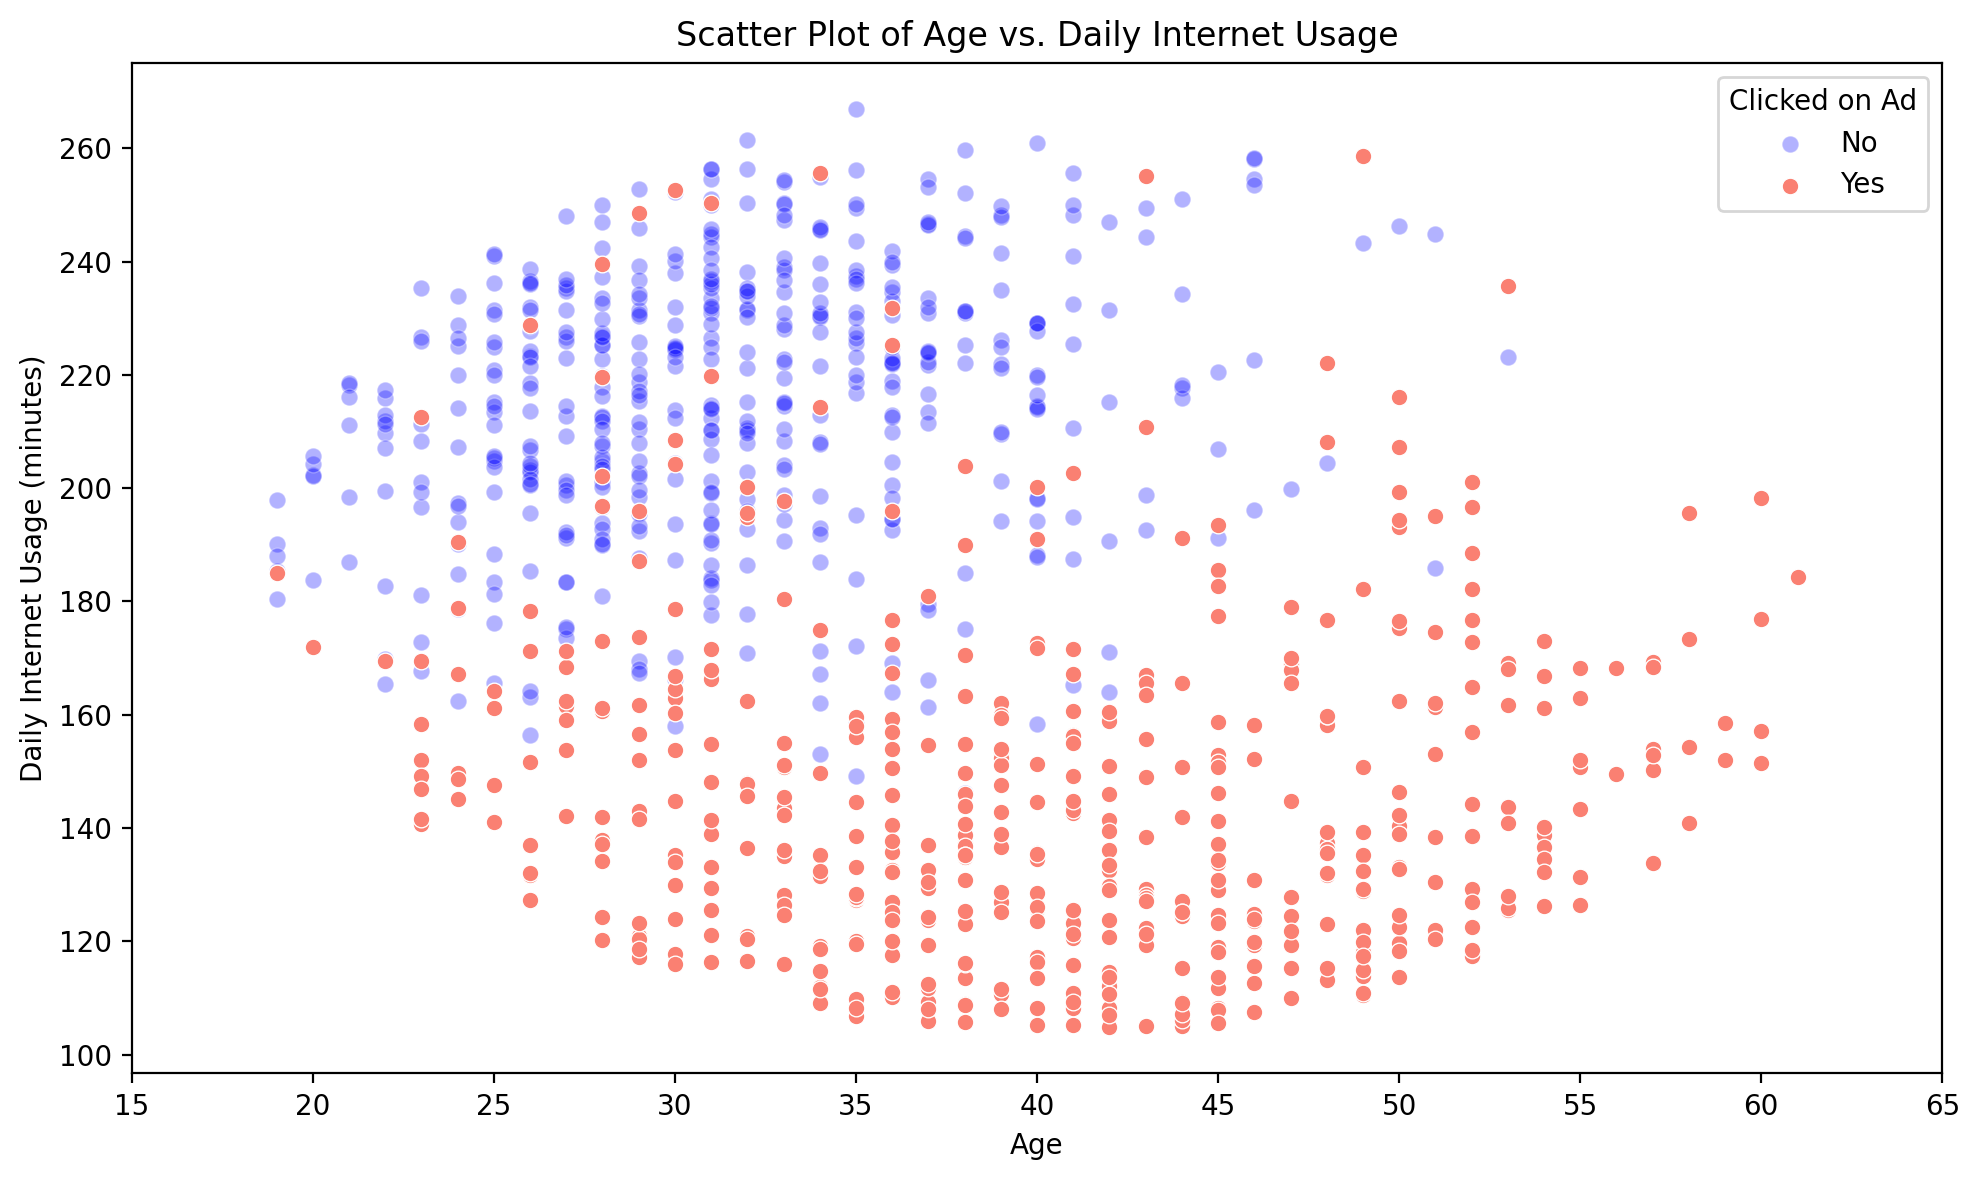

In [24]:
plt.figure(figsize=(10, 6), dpi=200)

# Reducing the opacity of the "No" points to see overlapping points
sns.scatterplot(data=df[df['Clicked on Ad'] == 'No'], x='Age', y='Daily Internet Usage', color='blue', alpha=0.3, label='No')
sns.scatterplot(data=df[df['Clicked on Ad'] == 'Yes'], x='Age', y='Daily Internet Usage', color='salmon', alpha=1.0, label='Yes')

plt.title('Scatter Plot of Age vs. Daily Internet Usage')
plt.xlabel('Age')
plt.xticks(np.arange(15, 70, 5))
plt.ylabel('Daily Internet Usage (minutes)')
plt.legend(title='Clicked on Ad')
plt.tight_layout()
plt.savefig('Scatter Plot of Age vs. Daily Internet Usage.png', dpi=300, bbox_inches='tight')

plt.show()


**Ad Clicks:**
- Users who clicked on ads (**"Yes"**) are more evenly distributed **under 180 minutes** of Daily Internet Usage.
- While users who did not click on ads (**"No"**) tend to have **higher** daily internet usage on average (over 180 minutes).
- By age distribution, users with age around **20 - 30 years old** are tend to **not click** on ads while users with age around **35 - 50 years old** are more likely to **clicked** on ads.

## Age Distribution by Daily Time Spent On Site

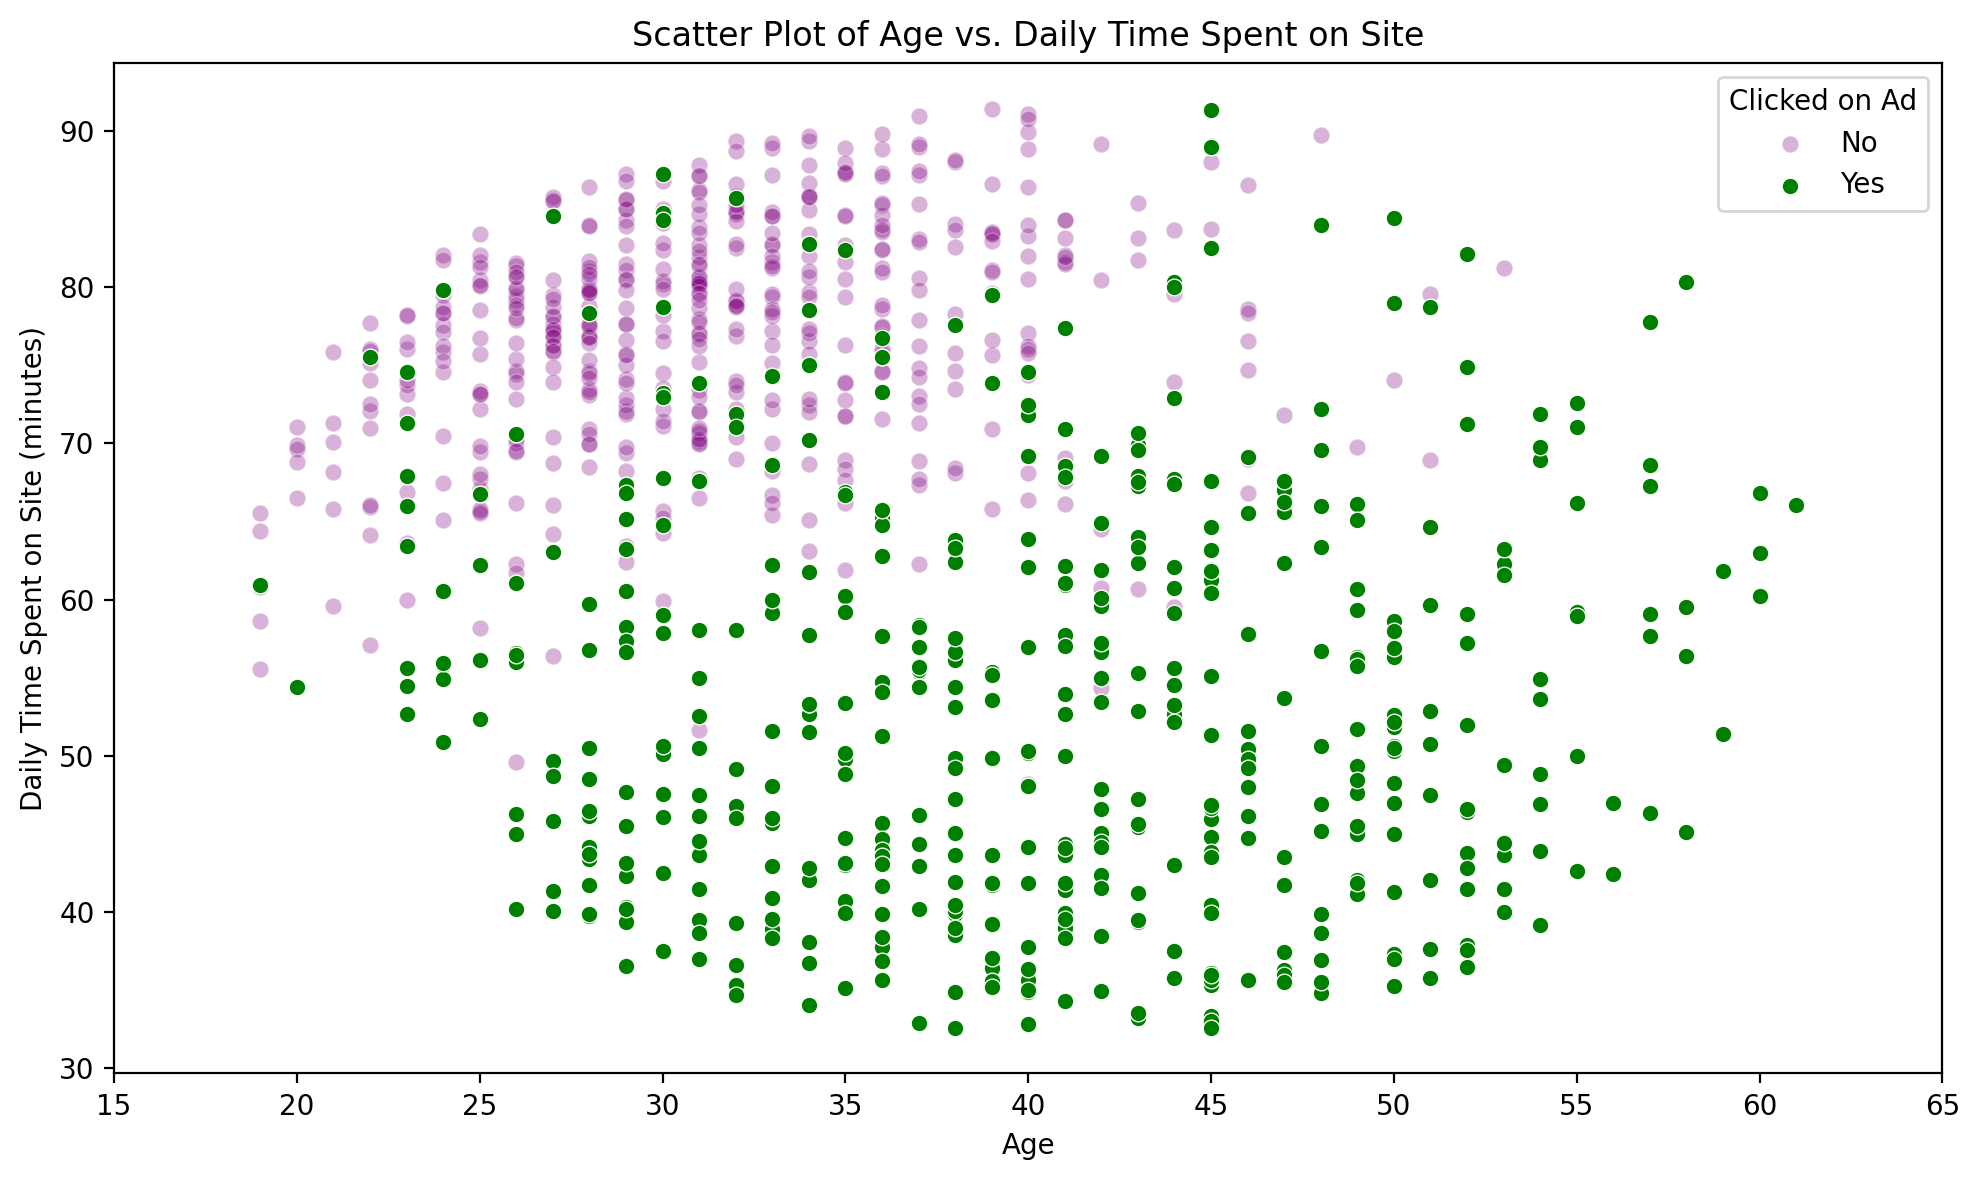

In [25]:
plt.figure(figsize=(10, 6), dpi=200)

# Reducing the opacity of the "No" points to see overlapping points
sns.scatterplot(data=df[df['Clicked on Ad'] == 'No'], x='Age', y='Daily Time Spent on Site', color='purple', alpha=0.3, label='No')
sns.scatterplot(data=df[df['Clicked on Ad'] == 'Yes'], x='Age', y='Daily Time Spent on Site', color='green', alpha=1.0, label='Yes')

plt.title('Scatter Plot of Age vs. Daily Time Spent on Site')
plt.xlabel('Age')
plt.xticks(np.arange(15, 70, 5))
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.legend(title='Clicked on Ad')
plt.tight_layout()
plt.savefig('Scatter Plot of Age vs. Daily Time Spent on Site.png', dpi=300, bbox_inches='tight')

plt.show()


**Correlation between Age and Daily Internet Usage:**
- there is a wide range of daily time spent on site across different ages, with **no clear linear** relationship between age and daily internet usage.

**Ad Clicks:**
- Users with **high** time spent on site tend to **not click** the ad with age around **20 - 40** years old.
- While users wit **low** time spent on site with age around **30 - 50** years old are tend to **click** the ad.

# Multivariate Analysis

## Correlation between numerical features

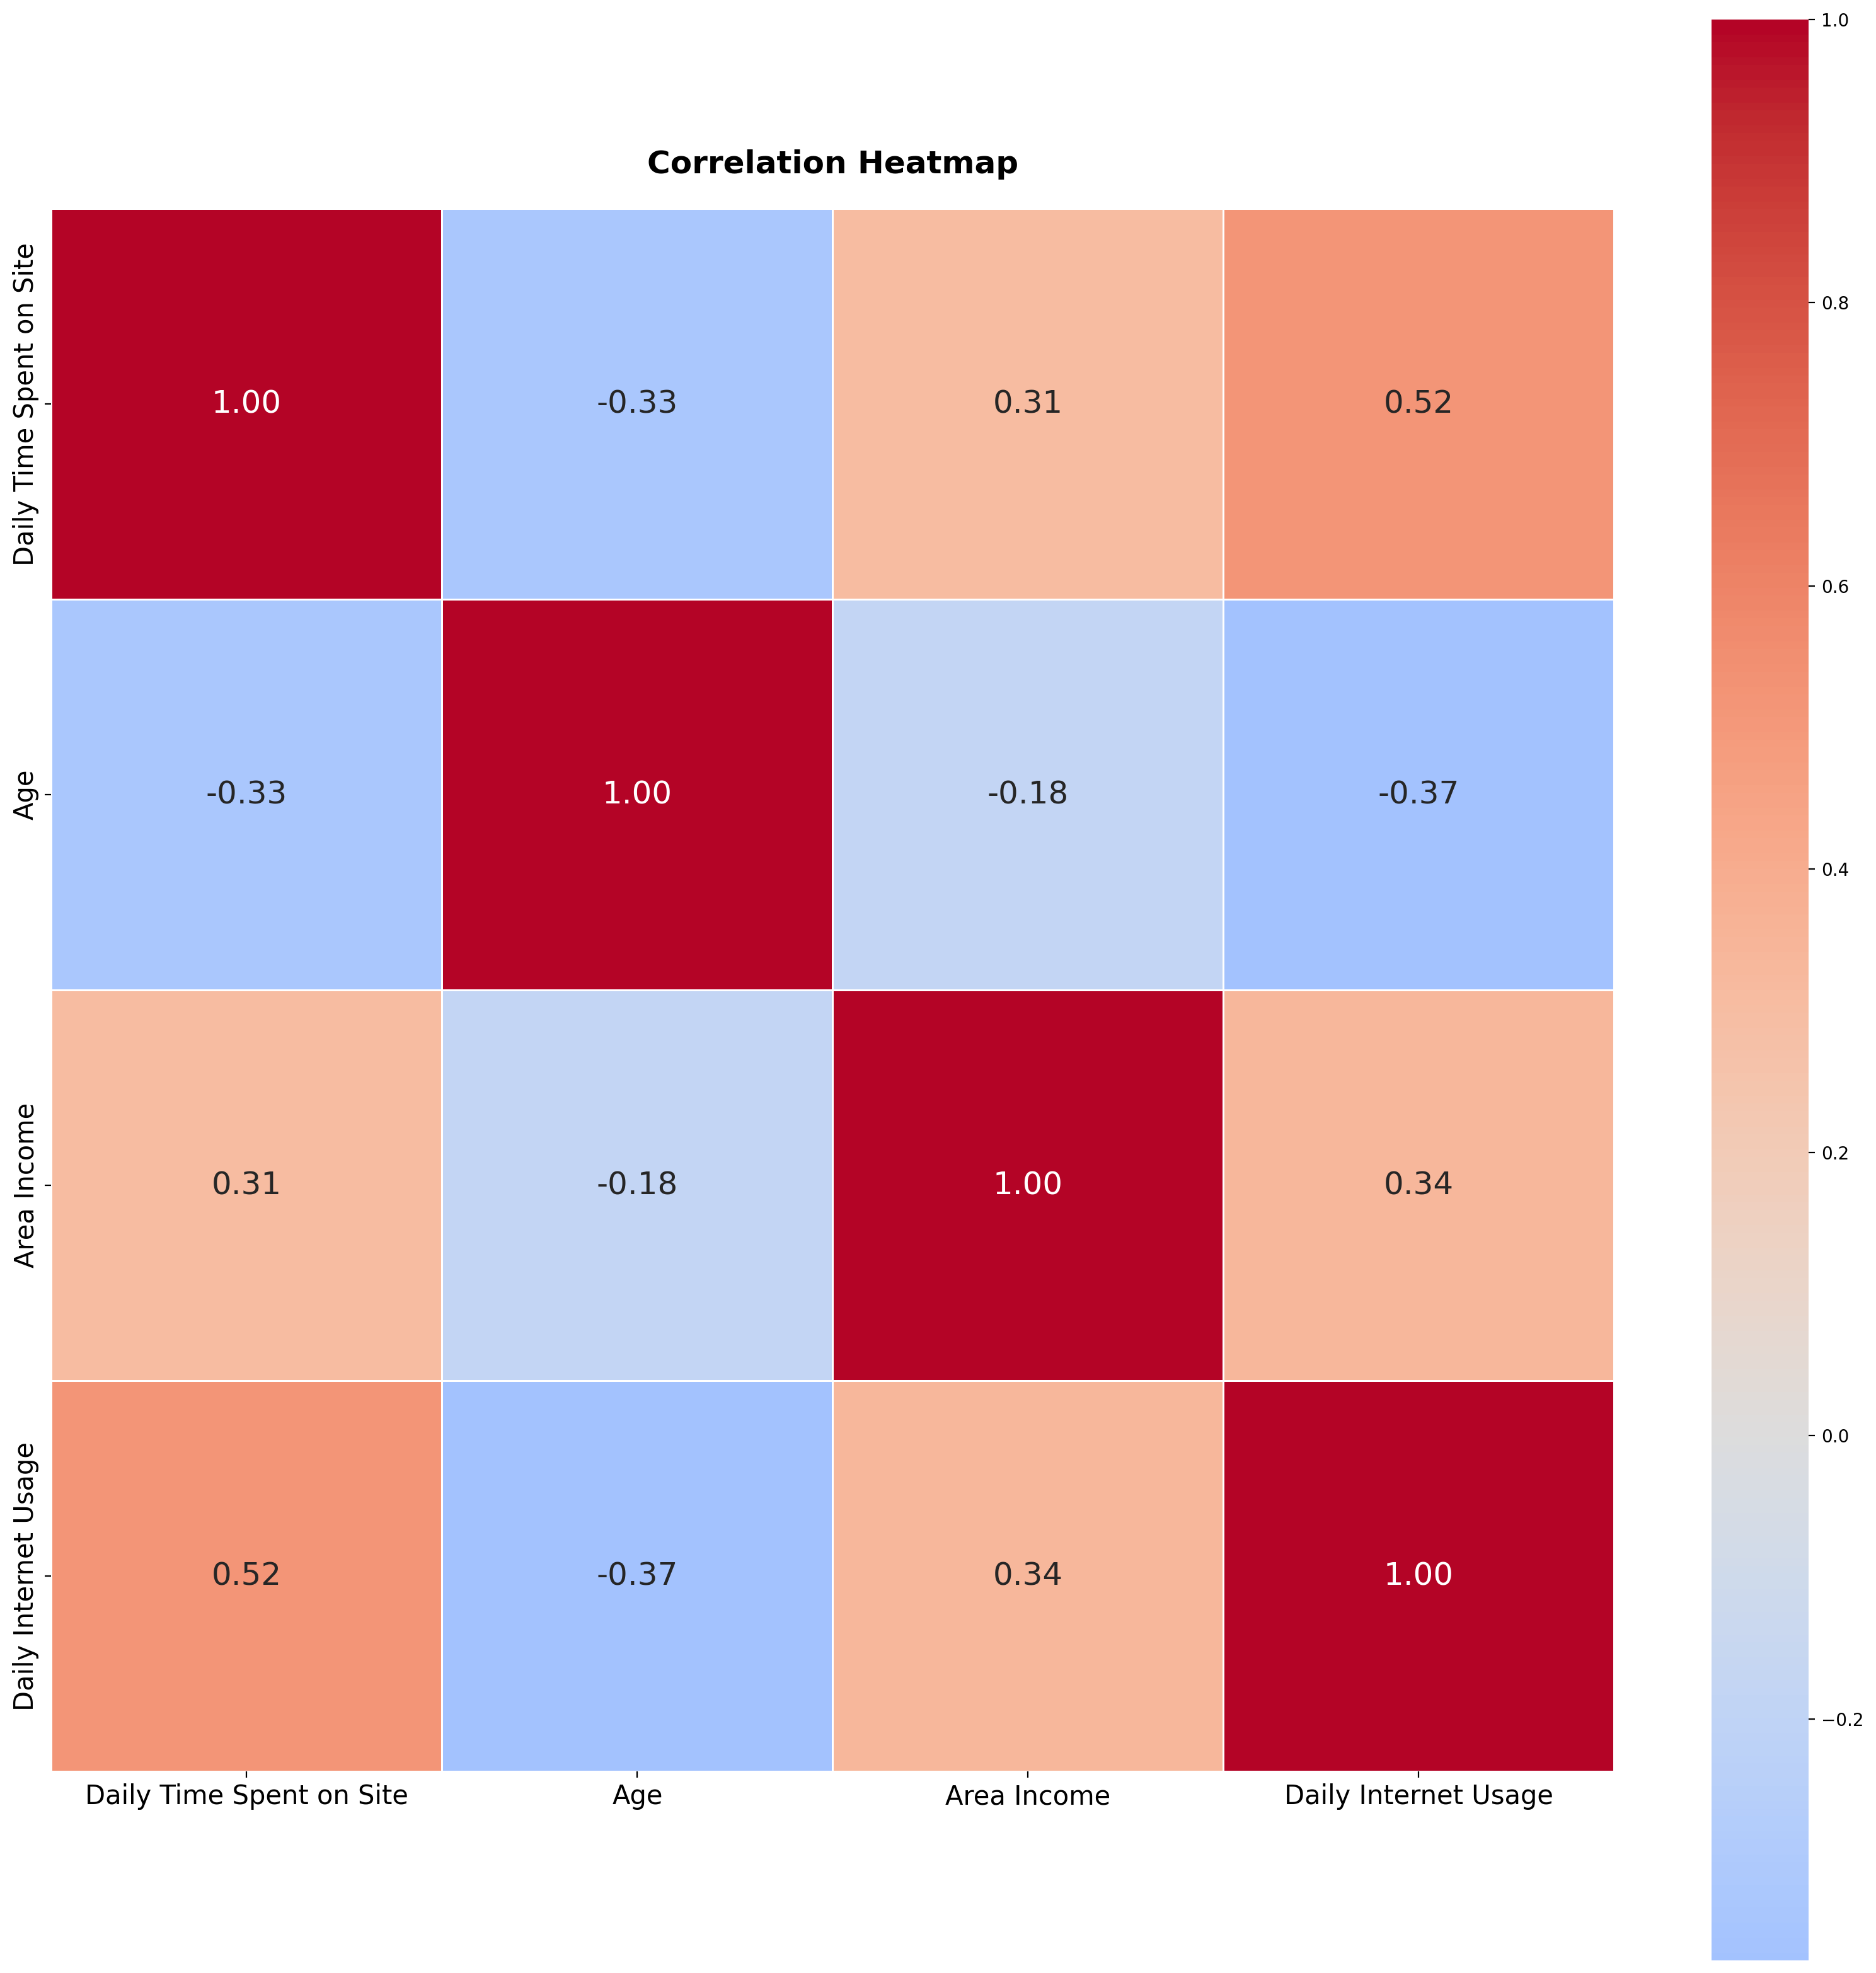

In [26]:
numerical_cols = df.select_dtypes(['number']).columns
plt.figure(figsize=(20, 20), dpi=200)
correlation_matrix = df[numerical_cols].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, annot_kws={'size': 18},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap', pad = 20, fontweight='bold', fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Correlation Heatmap.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

**Insight:**
- **Moderate Positive Correlation** <br>
    - Daily Internet Usage and Daily Time Spent on Site: There is a moderate positive correlation (0.52), indicating that as daily internet usage increases, the time spent on the site also tends to increase.

- **Slightly Positive Correlation** <br>
    - Area Income and Daily Internet Usage: A slightly positive correlation (0.34) suggests that individuals with higher area income may have slightly higher daily internet usage.
    - Area Income and Daily Time Spent on Site: There is also a slight positive correlation (0.31), indicating that higher income areas might spend a bit more time on the site.

- **Low Negative Correlation** <br>
    - Age and Daily Internet Usage: A low negative correlation (−0.37) implies that as age increases, daily internet usage slightly decreases.
    - Age and Daily Time Spent on Site: Similarly, there is a low negative correlation (−0.33), suggesting older individuals might spend less time on the site.


## Correlation between categorical features

In [27]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [28]:
from scipy.stats import chi2_contingency

def chi_square_test(df, feature, target='Clicked on Ad'):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return feature, chi2, p_value, dof

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Clicked on Ad')

# Lakukan uji Chi-Square untuk setiap fitur kategorikal
results = []    
for feature in categorical_features:
    results.append(chi_square_test(df, feature))

# Buat DataFrame dari hasil dan urutkan berdasarkan p-value
results_df = pd.DataFrame(results, columns=['Feature', 'Chi-Square', 'p-value', 'DoF'])
results_df = results_df.sort_values('p-value')

# Tampilkan hasil
print("Chi-Square Test Results for Categorical Features vs Clicked on Ad:")
print(results_df.to_string(index=False))

Chi-Square Test Results for Categorical Features vs Clicked on Ad:
 Feature  Chi-Square  p-value  DoF
    city   34.947015 0.206285   29
    Male    1.091360 0.296170    1
province   16.021392 0.380631   15
category    6.440443 0.695155    9


All of these features shows a p-value more than 5% (0.05) which is no a significant association with ad clicks. Even these features doesn't show a significant association in chi-squared test, it might still contributed to the model's predictive power when combined with other features. They could still be useful in non-linear models or when interacting with other features.